#### A python notebook to analyze `Political Marketing` data:

In [6]:
import pandas as pd
import numpy as np
import openpyxl as opx
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline

In [7]:
# Load the dataset present in .xlsx format
df = pd.read_excel('../datasets/06a-Dataset_Political_marketing.xlsx')


In [8]:
df

,candidato,i,date,t,day_week,day_week_name,turn,attack,before_after_attack,pt_announce_haddad,...,wordvol_twitter,hashtagvol_twitter,positive_twitter,neutral_twitter,negative_twitter,candidatesentiment,ideology,intention_vote,Brazilian_index,time2
0,bolsonaro,Bolsonaro,2018-08-31,1,2018-08-31,Friday,1st,No,Before Bolsonaro's attack,Before F. Haddad announcement,...,91.5,0,12.5,74.0,5.0,0.081967,1,0.2000,76677.531250,2018-08-31
1,bolsonaro,Bolsonaro,2018-09-01,2,2018-09-01,Saturday,1st,No,Before Bolsonaro's attack,Before F. Haddad announcement,...,97.0,0,15.5,79.5,2.0,0.139175,1,0.2040,76515.929688,2018-09-01
2,bolsonaro,Bolsonaro,2018-09-02,3,2018-09-02,Sunday,1st,No,Before Bolsonaro's attack,Before F. Haddad announcement,...,90.0,0,6.5,72.5,11.0,-0.050000,1,0.2080,76354.328125,2018-09-02
3,bolsonaro,Bolsonaro,2018-09-03,4,2018-09-03,Monday,1st,No,Before Bolsonaro's attack,Before F. Haddad announcement,...,139.0,0,13.5,118.0,7.5,0.043165,1,0.2120,76192.726562,2018-09-03
4,bolsonaro,Bolsonaro,2018-09-04,5,2018-09-04,Tuesday,1st,No,Before Bolsonaro's attack,Before F. Haddad announcement,...,294.5,0,14.5,253.0,27.0,-0.042445,1,0.2160,74711.796875,2018-09-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,haddad,Haddad,2018-10-25,56,2018-10-25,Thursday,2nd,No,After Bolsonaro's attack,After F. Haddad announcement,...,633.0,14,31.5,571.5,30.0,0.002370,2,0.4400,84083.507812,2018-10-25
230,haddad,Haddad,2018-10-26,57,2018-10-26,Friday,2nd,No,After Bolsonaro's attack,After F. Haddad announcement,...,1209.0,38,59.0,1096.5,53.5,0.004549,2,0.4475,85719.867188,2018-10-26
231,haddad,Haddad,2018-10-27,58,2018-10-27,Saturday,2nd,No,After Bolsonaro's attack,After F. Haddad announcement,...,1175.0,14,59.5,1060.5,55.0,0.003830,2,0.4550,85078.815104,2018-10-27
232,haddad,Haddad,2018-10-28,59,2018-10-28,Sunday,2nd,No,After Bolsonaro's attack,After F. Haddad announcement,...,48.0,1,12.5,35.5,0.0,0.260417,2,0.4486,84437.763021,2018-10-28


In [9]:
# 1. BASIC DATASET INFORMATION
print("=== DATASET OVERVIEW ===")
print(f"Dataset Shape: {df.shape}")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print("\n=== COLUMN NAMES ===")
print(df.columns.tolist())
print("\n=== DATA TYPES ===")
print(df.dtypes)

=== DATASET OVERVIEW ===
Dataset Shape: (234, 28)
Number of rows: 234
Number of columns: 28

=== COLUMN NAMES ===
['candidato', 'i', 'date', 't', 'day_week', 'day_week_name', 'turn', 'attack', 'before_after_attack', 'pt_announce_haddad', 'cff_twitter', 'cff_instagram', 'twitter_mentions', 'twitter_impressions', 'comments_instagram', 'traditional_mentions', 'ownmedia_twitter', 'ownmedia_instagram', 'wordvol_twitter', 'hashtagvol_twitter', 'positive_twitter', 'neutral_twitter', 'negative_twitter', 'candidatesentiment', 'ideology', 'intention_vote', 'Brazilian_index', 'time2']

=== DATA TYPES ===
candidato                       object
i                               object
date                    datetime64[ns]
t                                int64
day_week                datetime64[ns]
day_week_name                   object
turn                            object
attack                          object
before_after_attack             object
pt_announce_haddad              object
cff_twitt

In [10]:
# 2. MISSING VALUES ANALYSIS
print("=== MISSING VALUES ANALYSIS ===")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing_Count': missing_values.values,
    'Missing_Percentage': missing_percentage.values
}).sort_values('Missing_Percentage', ascending=False)

print(missing_df[missing_df['Missing_Count'] > 0])
print(f"\nTotal missing values: {df.isnull().sum().sum()}")
print(f"Percentage of complete cases: {(df.dropna().shape[0] / df.shape[0]) * 100:.2f}%")

=== MISSING VALUES ANALYSIS ===
                Column  Missing_Count  Missing_Percentage
23  candidatesentiment              2            0.854701

Total missing values: 2
Percentage of complete cases: 99.15%


In [11]:
# 3. STATISTICAL SUMMARY
print("=== STATISTICAL SUMMARY FOR NUMERICAL COLUMNS ===")
numerical_cols = df.select_dtypes(include=[np.number]).columns
print(f"Numerical columns: {numerical_cols.tolist()}")
print("\nDescriptive Statistics:")
print(df[numerical_cols].describe())

=== STATISTICAL SUMMARY FOR NUMERICAL COLUMNS ===
Numerical columns: ['t', 'cff_twitter', 'cff_instagram', 'twitter_mentions', 'twitter_impressions', 'comments_instagram', 'traditional_mentions', 'ownmedia_twitter', 'ownmedia_instagram', 'wordvol_twitter', 'hashtagvol_twitter', 'positive_twitter', 'neutral_twitter', 'negative_twitter', 'candidatesentiment', 'ideology', 'intention_vote', 'Brazilian_index']

Descriptive Statistics:
                t   cff_twitter  cff_instagram  twitter_mentions  \
count  234.000000  2.340000e+02   2.340000e+02        234.000000   
mean    25.141026  1.116649e+06   1.171164e+06       2070.410256   
std     15.609553  5.681088e+05   1.607024e+06        100.911184   
min      1.000000  2.155560e+05   1.234530e+05        698.000000   
25%     12.000000  6.825085e+05   1.389695e+05       2052.000000   
50%     24.000000  9.847005e+05   3.299000e+05       2071.500000   
75%     35.750000  1.697666e+06   1.993151e+06       2099.000000   
max     60.000000  2.0

In [12]:
# 4. CATEGORICAL VARIABLES ANALYSIS
print("=== CATEGORICAL VARIABLES ANALYSIS ===")
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print(f"Categorical columns: {categorical_cols.tolist()}")

if len(categorical_cols) > 0:
    print("\nUnique values in categorical columns:")
    for col in categorical_cols:
        print(f"\n{col}:")
        print(f"  Unique values: {df[col].nunique()}")
        print(f"  Values: {df[col].unique()[:10]}")  # Show first 10 unique values
        print(f"  Value counts:\n{df[col].value_counts().head()}")
else:
    print("No categorical columns found.")

=== CATEGORICAL VARIABLES ANALYSIS ===
Categorical columns: ['candidato', 'i', 'day_week_name', 'turn', 'attack', 'before_after_attack', 'pt_announce_haddad']

Unique values in categorical columns:

candidato:
  Unique values: 5
  Values: ['bolsonaro' 'marina' 'ciro' 'alckmin' 'haddad']
  Value counts:
candidato
bolsonaro    60
haddad       60
marina       38
ciro         38
alckmin      38
Name: count, dtype: int64

i:
  Unique values: 5
  Values: ['Bolsonaro' 'Marina' 'Ciro' 'Alckmin' 'Haddad']
  Value counts:
i
Bolsonaro    60
Haddad       60
Marina       38
Ciro         38
Alckmin      38
Name: count, dtype: int64

day_week_name:
  Unique values: 7
  Values: ['Friday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday']
  Value counts:
day_week_name
Friday      36
Saturday    36
Sunday      36
Monday      33
Tuesday     31
Name: count, dtype: int64

turn:
  Unique values: 3
  Values: ['1st' '2nd' 'Post elections']
  Value counts:
turn
1st               190
2nd            

In [13]:
# 5. DATA DISTRIBUTION ANALYSIS
print("=== DATA DISTRIBUTION ANALYSIS ===")

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
print(f"Percentage of duplicates: {(duplicates / len(df)) * 100:.2f}%")

# Memory usage
print(f"\nMemory usage: {df.memory_usage(deep=True).sum() / 1024 / 1024:.2f} MB")

# First and last few rows
print("\n=== FIRST 3 ROWS ===")
print(df.head(3))
print("\n=== LAST 3 ROWS ===")
print(df.tail(3))

=== DATA DISTRIBUTION ANALYSIS ===
Number of duplicate rows: 0
Percentage of duplicates: 0.00%

Memory usage: 0.13 MB

=== FIRST 3 ROWS ===
   candidato          i       date  t   day_week day_week_name turn attack  \
0  bolsonaro  Bolsonaro 2018-08-31  1 2018-08-31        Friday  1st     No   
1  bolsonaro  Bolsonaro 2018-09-01  2 2018-09-01      Saturday  1st     No   
2  bolsonaro  Bolsonaro 2018-09-02  3 2018-09-02        Sunday  1st     No   

         before_after_attack             pt_announce_haddad  ...  \
0  Before Bolsonaro's attack  Before F. Haddad announcement  ...   
1  Before Bolsonaro's attack  Before F. Haddad announcement  ...   
2  Before Bolsonaro's attack  Before F. Haddad announcement  ...   

   wordvol_twitter  hashtagvol_twitter  positive_twitter  neutral_twitter  \
0             91.5                   0              12.5             74.0   
1             97.0                   0              15.5             79.5   
2             90.0                   0     

=== DISTRIBUTION PLOTS FOR NUMERICAL VARIABLES ===


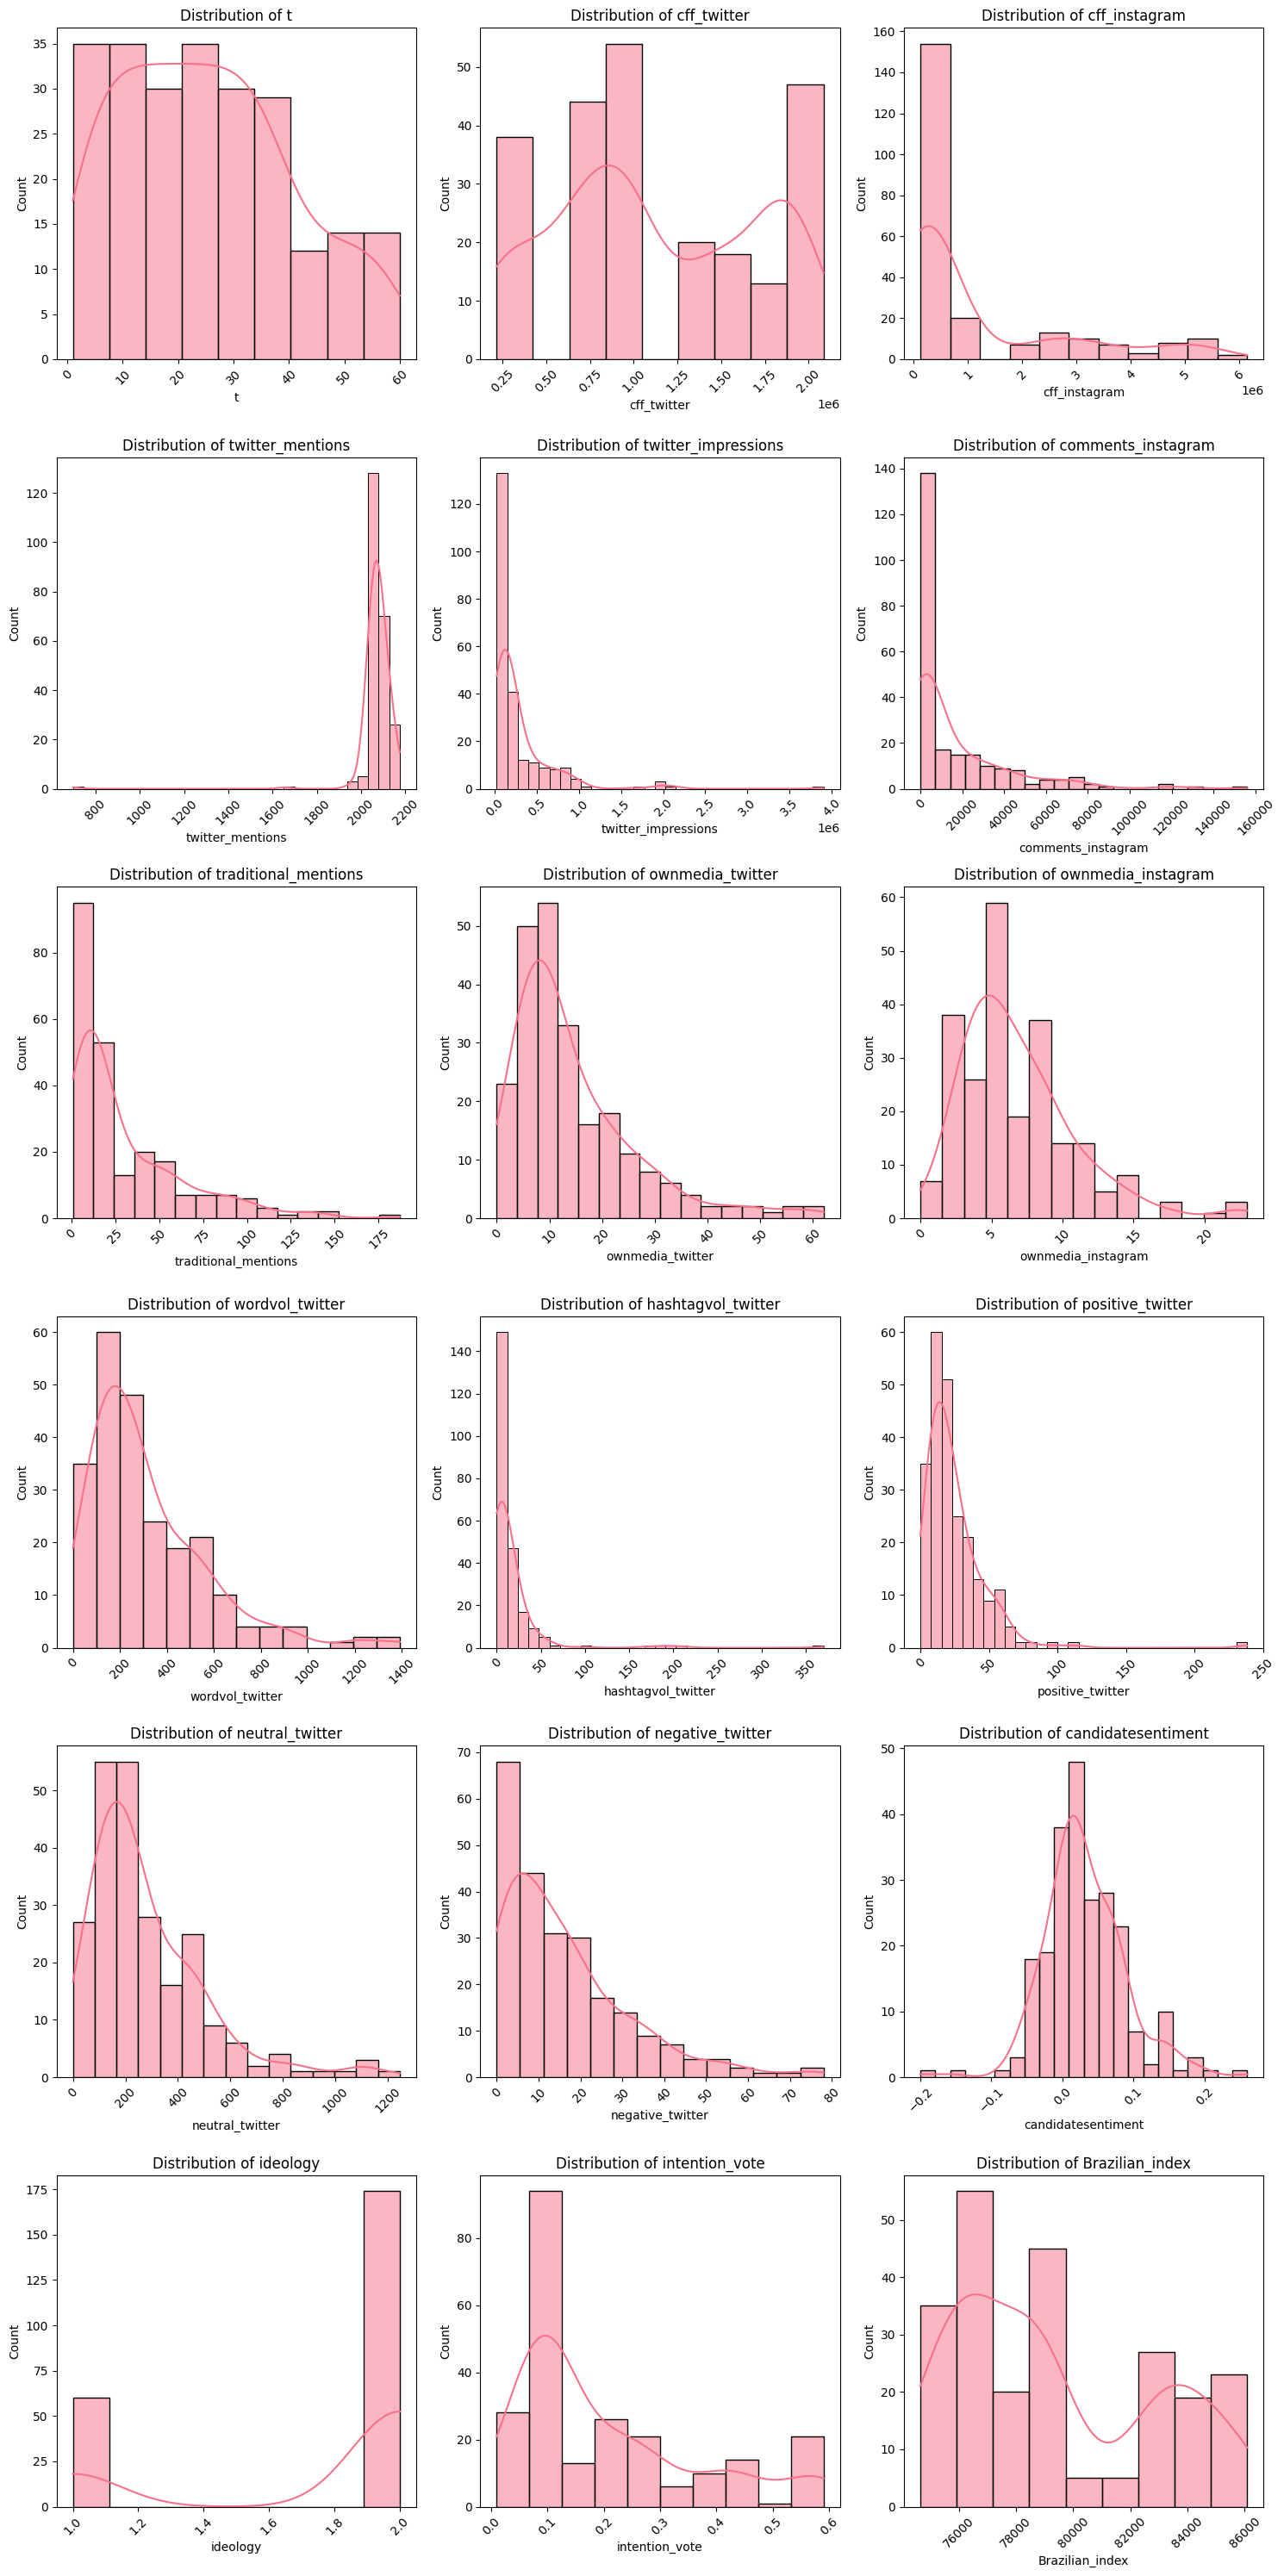

In [14]:
# 6. DISTRIBUTION PLOTS FOR NUMERICAL VARIABLES
print("=== DISTRIBUTION PLOTS FOR NUMERICAL VARIABLES ===")

numerical_cols = df.select_dtypes(include=[np.number]).columns

if len(numerical_cols) > 0:
    # Calculate number of rows and columns for subplots
    n_cols = min(3, len(numerical_cols))
    n_rows = (len(numerical_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    if n_rows == 1:
        axes = [axes] if n_cols == 1 else axes
    else:
        axes = axes.flatten()
    
    for i, col in enumerate(numerical_cols):
        sns.histplot(data=df, x=col, kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].tick_params(axis='x', rotation=45)
    
    # Hide empty subplots
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()
else:
    print("No numerical columns found for distribution plots.")

=== CORRELATION ANALYSIS ===


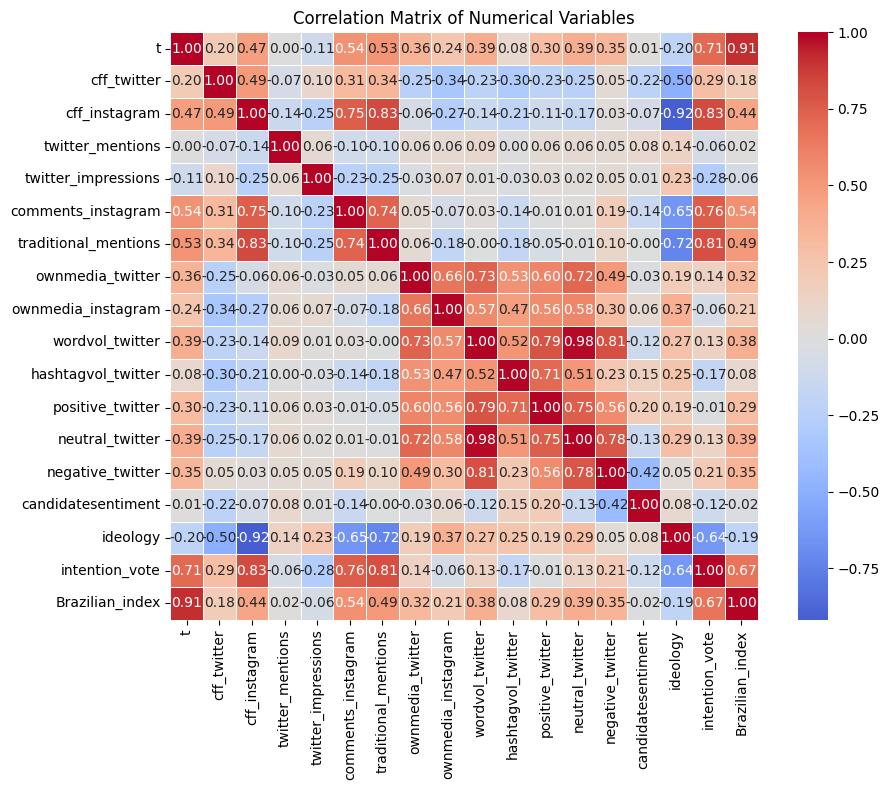


High correlations (>0.7 or <-0.7):
t - intention_vote: 0.708
t - Brazilian_index: 0.914
cff_instagram - comments_instagram: 0.745
cff_instagram - traditional_mentions: 0.828
cff_instagram - ideology: -0.918
cff_instagram - intention_vote: 0.827
comments_instagram - traditional_mentions: 0.735
comments_instagram - intention_vote: 0.755
traditional_mentions - ideology: -0.724
traditional_mentions - intention_vote: 0.812
ownmedia_twitter - wordvol_twitter: 0.732
ownmedia_twitter - neutral_twitter: 0.722
wordvol_twitter - positive_twitter: 0.786
wordvol_twitter - neutral_twitter: 0.982
wordvol_twitter - negative_twitter: 0.811
hashtagvol_twitter - positive_twitter: 0.714
positive_twitter - neutral_twitter: 0.746
neutral_twitter - negative_twitter: 0.782


In [15]:
# 7. CORRELATION ANALYSIS
print("=== CORRELATION ANALYSIS ===")

numerical_cols = df.select_dtypes(include=[np.number]).columns

if len(numerical_cols) > 1:
    # Calculate correlation matrix
    correlation_matrix = df[numerical_cols].corr()
    
    # Create correlation heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
                square=True, fmt='.2f', linewidths=0.5)
    plt.title('Correlation Matrix of Numerical Variables')
    plt.tight_layout()
    plt.show()
    
    # Find high correlations (>0.7 or <-0.7)
    high_corr_pairs = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_val = correlation_matrix.iloc[i, j]
            if abs(corr_val) > 0.7: # type: ignore
                high_corr_pairs.append((correlation_matrix.columns[i], 
                                      correlation_matrix.columns[j], 
                                      corr_val))
    
    if high_corr_pairs:
        print("\nHigh correlations (>0.7 or <-0.7):")
        for var1, var2, corr in high_corr_pairs:
            print(f"{var1} - {var2}: {corr:.3f}")
    else:
        print("\nNo high correlations found (>0.7 or <-0.7)")
else:
    print("Not enough numerical columns for correlation analysis.")

=== BOX PLOTS FOR OUTLIER DETECTION ===


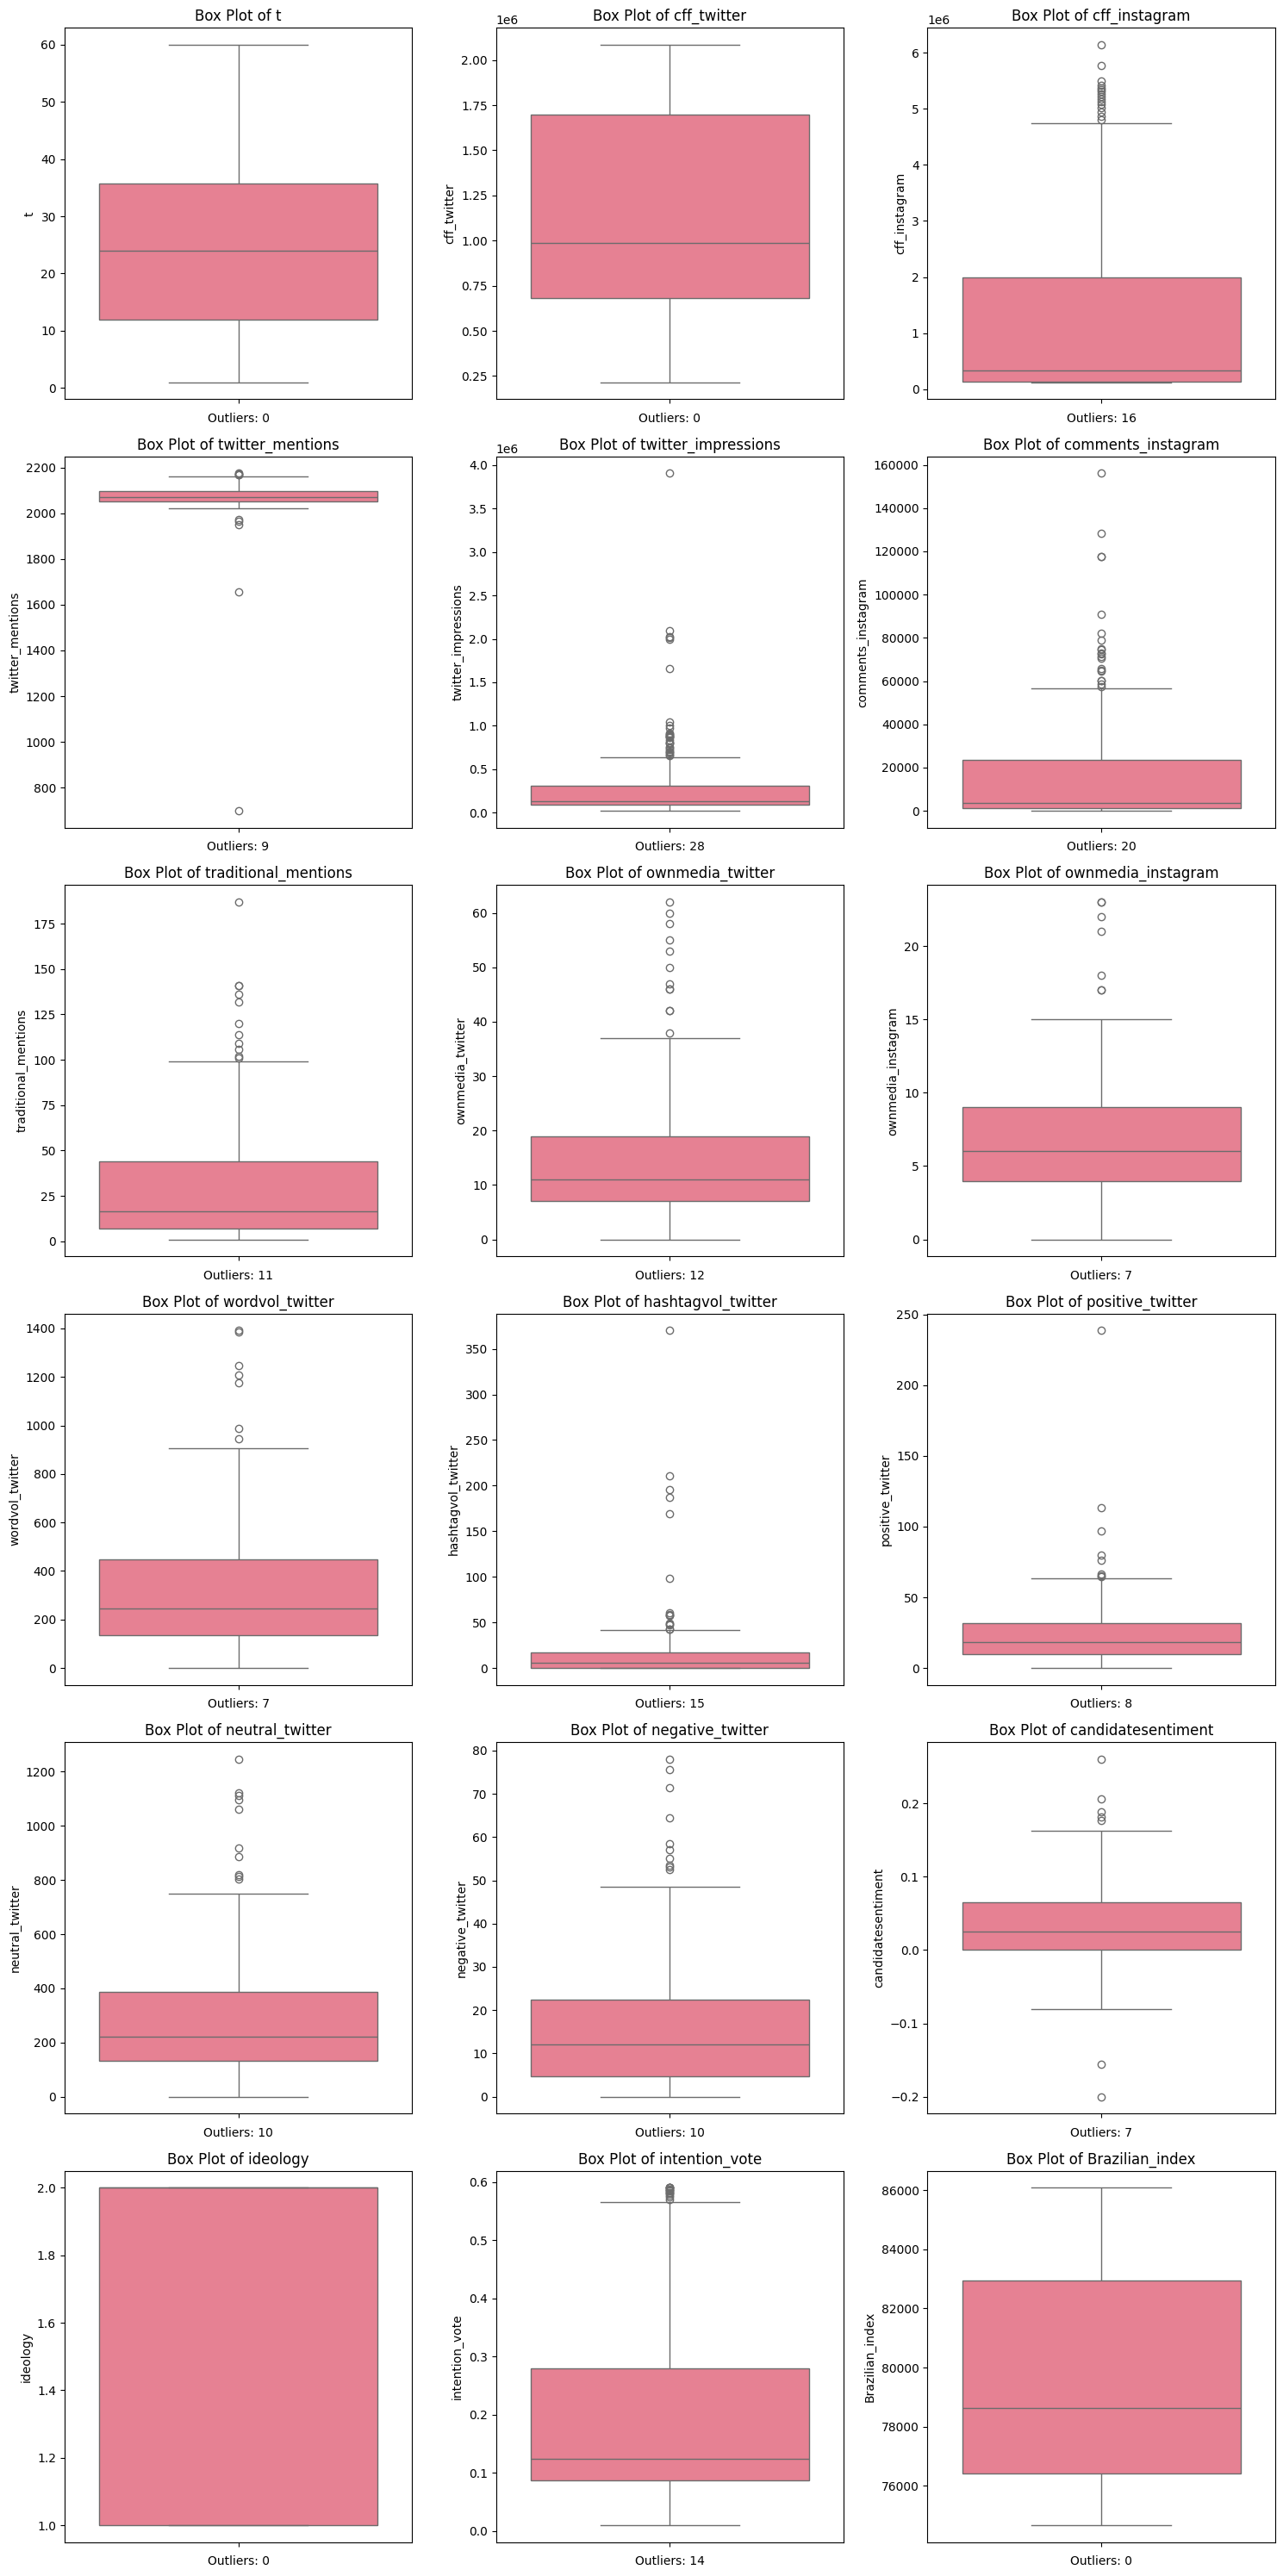

In [16]:
# 8. BOX PLOTS FOR OUTLIER DETECTION
print("=== BOX PLOTS FOR OUTLIER DETECTION ===")

numerical_cols = df.select_dtypes(include=[np.number]).columns

if len(numerical_cols) > 0:
    # Calculate number of rows and columns for subplots
    n_cols = min(3, len(numerical_cols))
    n_rows = (len(numerical_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    if n_rows == 1:
        axes = [axes] if n_cols == 1 else axes
    else:
        axes = axes.flatten()
    
    for i, col in enumerate(numerical_cols):
        sns.boxplot(y=df[col], ax=axes[i])
        axes[i].set_title(f'Box Plot of {col}')
        axes[i].tick_params(axis='x', rotation=45)
        
        # Count outliers
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)][col]
        axes[i].set_xlabel(f'Outliers: {len(outliers)}')
    
    # Hide empty subplots
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()
else:
    print("No numerical columns found for box plots.")

=== CATEGORICAL VARIABLES VISUALIZATION ===


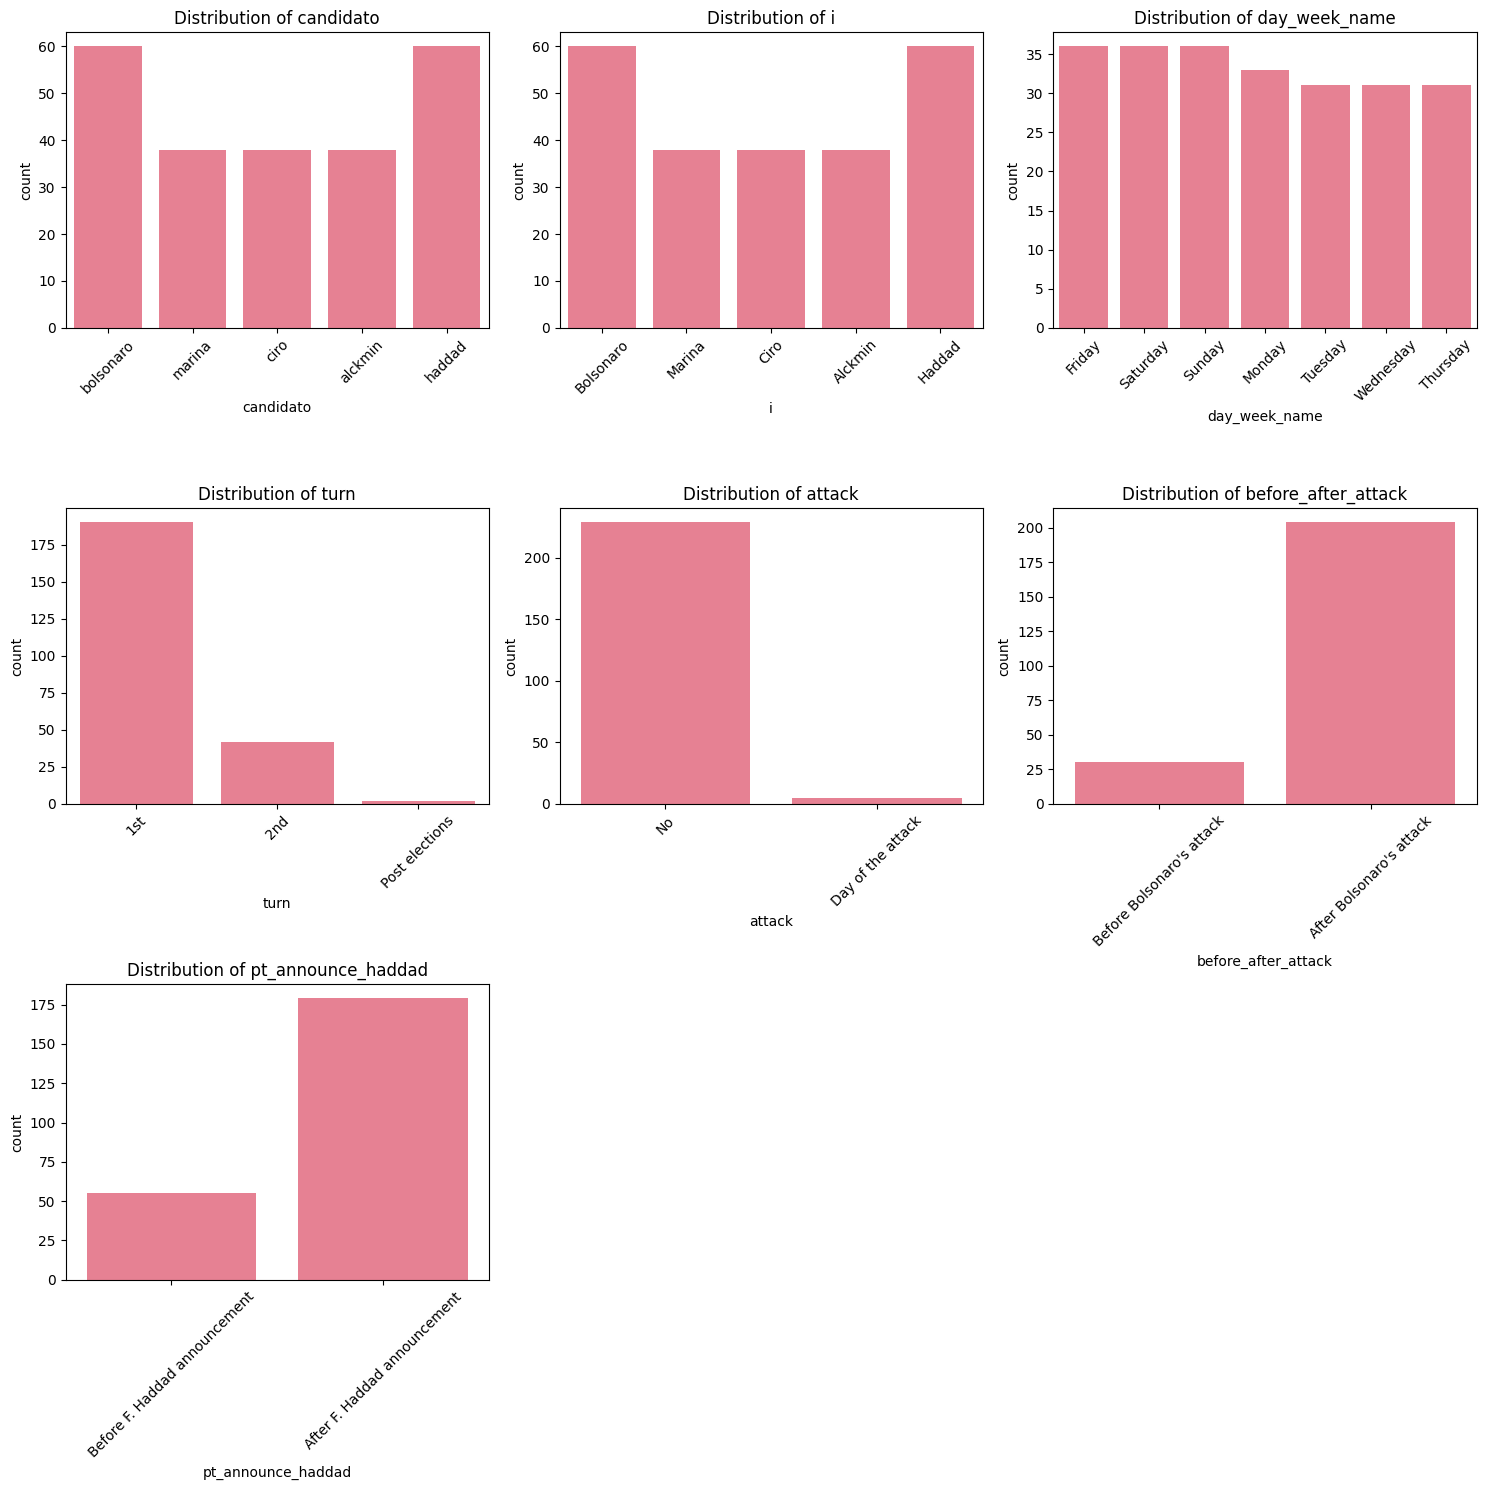

In [17]:
# 9. CATEGORICAL VARIABLES VISUALIZATION
print("=== CATEGORICAL VARIABLES VISUALIZATION ===")

categorical_cols = df.select_dtypes(include=['object', 'category']).columns

if len(categorical_cols) > 0:
    # Calculate number of rows and columns for subplots
    n_cols = min(3, len(categorical_cols))
    n_rows = (len(categorical_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    if n_rows == 1:
        axes = [axes] if n_cols == 1 else axes
    else:
        axes = axes.flatten()
    
    for i, col in enumerate(categorical_cols):
        # For categorical variables with many unique values, show only top 10
        value_counts = df[col].value_counts()
        if len(value_counts) > 10:
            value_counts = value_counts.head(10)
            title = f'Top 10 Values in {col}'
        else:
            title = f'Distribution of {col}'
        
        sns.countplot(data=df[df[col].isin(value_counts.index)], x=col, ax=axes[i])
        axes[i].set_title(title)
        axes[i].tick_params(axis='x', rotation=45)
    
    # Hide empty subplots
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()
else:
    print("No categorical columns found for visualization.")

=== PAIR PLOTS FOR MULTIVARIATE ANALYSIS ===
Too many numerical variables (18) for pair plots. Showing first 5:
Selected variables: ['t', 'cff_twitter', 'cff_instagram', 'twitter_mentions', 'twitter_impressions']


<Figure size 1200x1000 with 0 Axes>

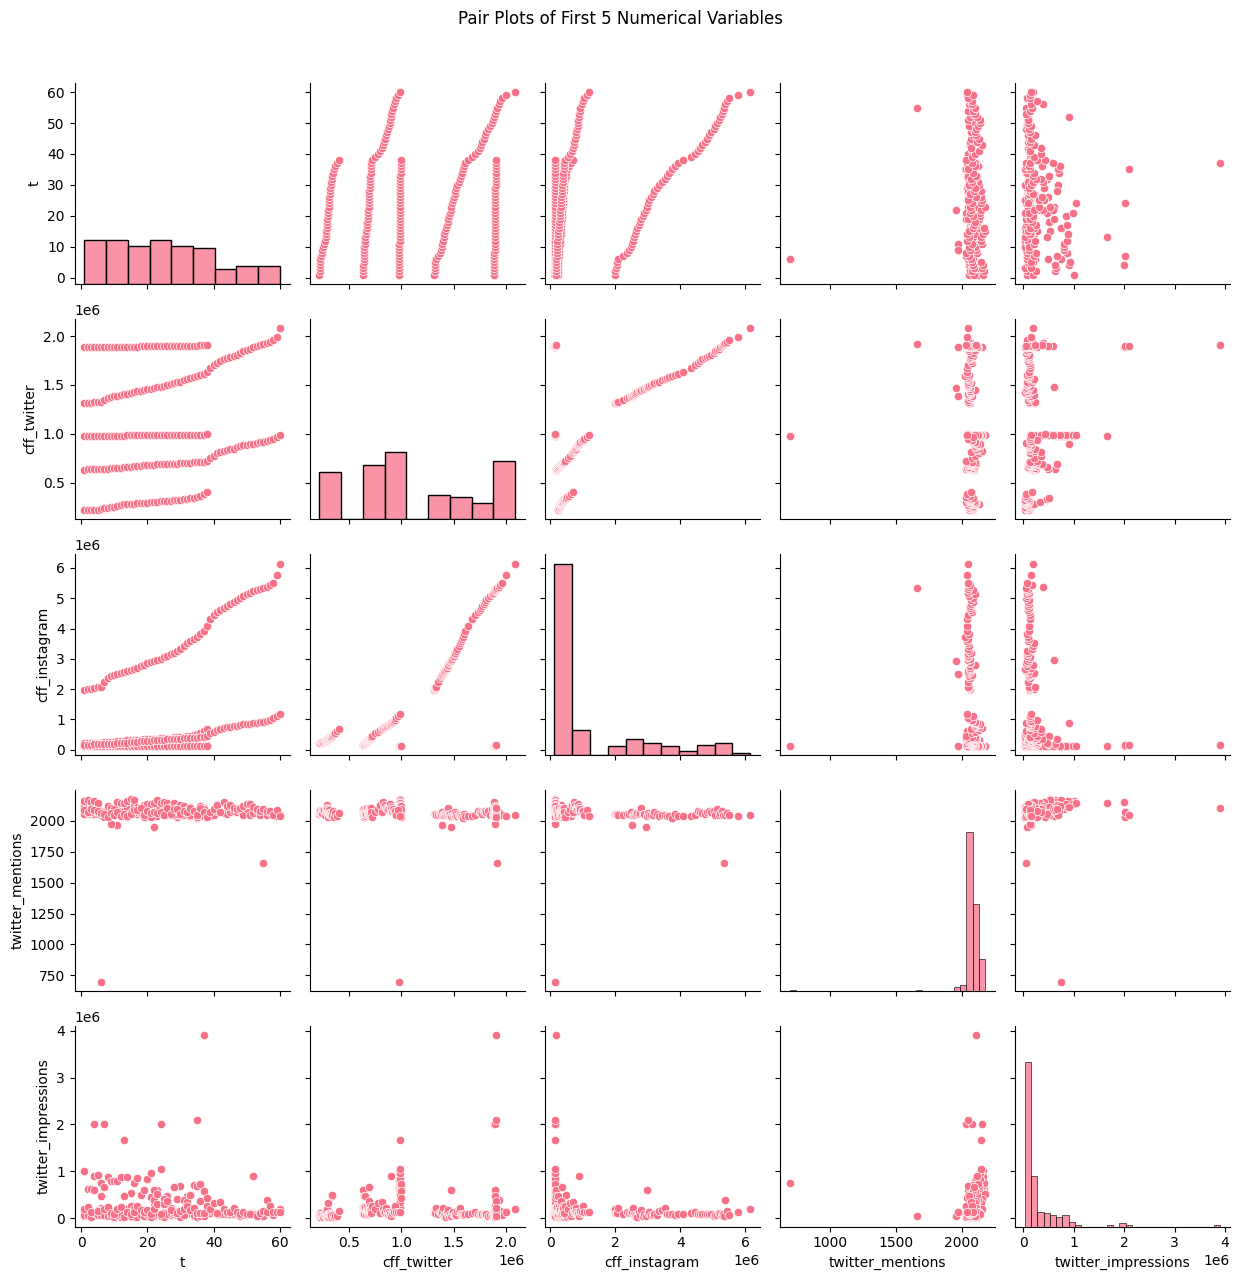

In [18]:
# 10. PAIR PLOTS FOR MULTIVARIATE ANALYSIS
print("=== PAIR PLOTS FOR MULTIVARIATE ANALYSIS ===")

numerical_cols = df.select_dtypes(include=[np.number]).columns

if len(numerical_cols) > 1 and len(numerical_cols) <= 5:  # Only for small number of variables
    print(f"Creating pair plots for numerical variables: {list(numerical_cols)}")
    
    plt.figure(figsize=(12, 10))
    sns.pairplot(df[numerical_cols])
    plt.suptitle('Pair Plots of Numerical Variables', y=1.02)
    plt.tight_layout()
    plt.show()
elif len(numerical_cols) > 5:
    print(f"Too many numerical variables ({len(numerical_cols)}) for pair plots. Showing first 5:")
    first_five = numerical_cols[:5]
    print(f"Selected variables: {list(first_five)}")
    
    plt.figure(figsize=(12, 10))
    sns.pairplot(df[first_five])
    plt.suptitle('Pair Plots of First 5 Numerical Variables', y=1.02)
    plt.tight_layout()
    plt.show()
else:
    print("Not enough numerical variables for pair plots.")

In [19]:
# 11. DETAILED OUTLIER ANALYSIS
print("=== DETAILED OUTLIER ANALYSIS ===")

numerical_cols = df.select_dtypes(include=[np.number]).columns

if len(numerical_cols) > 0:
    print("Outlier Analysis using IQR Method:")
    outlier_summary = []
    
    for col in numerical_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_count = len(outliers)
        outlier_percentage = (outlier_count / len(df)) * 100
        
        outlier_summary.append({
            'Column': col,
            'Q1': Q1,
            'Q3': Q3,
            'IQR': IQR,
            'Lower_Bound': lower_bound,
            'Upper_Bound': upper_bound,
            'Outlier_Count': outlier_count,
            'Outlier_Percentage': outlier_percentage
        })
    
    outlier_df = pd.DataFrame(outlier_summary)
    print(outlier_df)
    
    # Outliers using Z-score method
    print("\n=== OUTLIER ANALYSIS USING Z-SCORE METHOD ===")
    z_score_threshold = 3
    for col in numerical_cols:
        z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
        z_outliers = df[z_scores > z_score_threshold]
        print(f"{col}: {len(z_outliers)} outliers using Z-score > {z_score_threshold}")
else:
    print("No numerical columns found for outlier analysis.")

=== DETAILED OUTLIER ANALYSIS ===
Outlier Analysis using IQR Method:
                  Column             Q1            Q3           IQR  \
0                      t      12.000000  3.575000e+01  2.375000e+01   
1            cff_twitter  682508.500000  1.697666e+06  1.015157e+06   
2          cff_instagram  138969.500000  1.993151e+06  1.854182e+06   
3       twitter_mentions    2052.000000  2.099000e+03  4.700000e+01   
4    twitter_impressions   90629.500000  3.154205e+05  2.247910e+05   
5     comments_instagram    1138.750000  2.362500e+04  2.248625e+04   
6   traditional_mentions       7.000000  4.400000e+01  3.700000e+01   
7       ownmedia_twitter       7.000000  1.900000e+01  1.200000e+01   
8     ownmedia_instagram       4.000000  9.000000e+00  5.000000e+00   
9        wordvol_twitter     136.000000  4.483750e+02  3.123750e+02   
10    hashtagvol_twitter       0.000000  1.700000e+01  1.700000e+01   
11      positive_twitter      10.125000  3.150000e+01  2.137500e+01   
12      

In [20]:
# 12. DATA QUALITY ASSESSMENT
print("=== DATA QUALITY ASSESSMENT ===")

# Check for constant columns (columns with only one unique value)
constant_cols = []
for col in df.columns:
    if df[col].nunique() == 1:
        constant_cols.append(col)

if constant_cols:
    print(f"Constant columns (only 1 unique value): {constant_cols}")
else:
    print("No constant columns found.")

# Check for nearly constant columns (>95% same value)
nearly_constant_cols = []
for col in df.columns:
    mode_frequency = df[col].value_counts().iloc[0] / len(df)
    if mode_frequency > 0.95 and df[col].nunique() > 1:
        nearly_constant_cols.append((col, mode_frequency))

if nearly_constant_cols:
    print("\nNearly constant columns (>95% same value):")
    for col, freq in nearly_constant_cols:
        print(f"  {col}: {freq:.2%} of values are the same")
else:
    print("\nNo nearly constant columns found.")

# Check for high cardinality categorical columns
high_cardinality_cols = []
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    cardinality_ratio = df[col].nunique() / len(df)
    if cardinality_ratio > 0.5:  # More than 50% unique values
        high_cardinality_cols.append((col, df[col].nunique(), cardinality_ratio))

if high_cardinality_cols:
    print("\nHigh cardinality categorical columns (>50% unique):")
    for col, unique_count, ratio in high_cardinality_cols:
        print(f"  {col}: {unique_count} unique values ({ratio:.2%})")
else:
    print("\nNo high cardinality categorical columns found.")

=== DATA QUALITY ASSESSMENT ===
No constant columns found.

Nearly constant columns (>95% same value):
  attack: 97.86% of values are the same

No high cardinality categorical columns found.


In [21]:
# 13. EDA SUMMARY & KEY INSIGHTS
print("=== COMPREHENSIVE EDA SUMMARY ===")

# Dataset overview
print(f"📊 DATASET OVERVIEW:")
print(f"   • Total rows: {df.shape[0]:,}")
print(f"   • Total columns: {df.shape[1]}")
print(f"   • Memory usage: {df.memory_usage(deep=True).sum() / 1024 / 1024:.2f} MB")

# Data types breakdown
numerical_count = len(df.select_dtypes(include=[np.number]).columns)
categorical_count = len(df.select_dtypes(include=['object', 'category']).columns)
datetime_count = len(df.select_dtypes(include=['datetime64']).columns)

print(f"\n📈 DATA TYPES:")
print(f"   • Numerical columns: {numerical_count}")
print(f"   • Categorical columns: {categorical_count}")
print(f"   • Datetime columns: {datetime_count}")

# Missing values summary
total_missing = df.isnull().sum().sum()
missing_percentage = (total_missing / (df.shape[0] * df.shape[1])) * 100

print(f"\n❌ MISSING VALUES:")
print(f"   • Total missing values: {total_missing:,}")
print(f"   • Percentage of missing data: {missing_percentage:.2f}%")
print(f"   • Complete cases: {(df.dropna().shape[0] / df.shape[0]) * 100:.2f}%")

# Duplicates
duplicate_count = df.duplicated().sum()
print(f"\n🔄 DUPLICATES:")
print(f"   • Duplicate rows: {duplicate_count}")
print(f"   • Percentage of duplicates: {(duplicate_count / len(df)) * 100:.2f}%")

print("\n" + "="*60)
print("🔍 KEY INSIGHTS & NEXT STEPS:")
print("="*60)

# Generate insights based on analysis
insights = []

if total_missing > 0:
    insights.append("• Handle missing values through imputation or removal")

if duplicate_count > 0:
    insights.append("• Consider removing or investigating duplicate entries")

if numerical_count > 0:
    insights.append("• Explore relationships between numerical variables")
    insights.append("• Check for outliers and consider treatment strategies")

if categorical_count > 0:
    insights.append("• Analyze categorical distributions for potential data quality issues")
    insights.append("• Consider encoding strategies for machine learning models")

insights.append("• Investigate domain-specific patterns in the political marketing data")
insights.append("• Consider feature engineering based on identified patterns")

for insight in insights:
    print(insight)

=== COMPREHENSIVE EDA SUMMARY ===
📊 DATASET OVERVIEW:
   • Total rows: 234
   • Total columns: 28
   • Memory usage: 0.13 MB

📈 DATA TYPES:
   • Numerical columns: 18
   • Categorical columns: 7
   • Datetime columns: 3

❌ MISSING VALUES:
   • Total missing values: 2
   • Percentage of missing data: 0.03%
   • Complete cases: 99.15%

🔄 DUPLICATES:
   • Duplicate rows: 0
   • Percentage of duplicates: 0.00%

🔍 KEY INSIGHTS & NEXT STEPS:
• Handle missing values through imputation or removal
• Explore relationships between numerical variables
• Check for outliers and consider treatment strategies
• Analyze categorical distributions for potential data quality issues
• Consider encoding strategies for machine learning models
• Investigate domain-specific patterns in the political marketing data
• Consider feature engineering based on identified patterns


In [22]:
print(f"\n✅ EDA COMPLETED - Ready for further analysis and modeling!")


✅ EDA COMPLETED - Ready for further analysis and modeling!


# 🏛️ Advanced Political Marketing Analysis

This section provides in-depth analysis to answer specific research questions about the political campaign data, focusing on sentiment analysis, social media impact, and voter behavior patterns.

## Research Questions Overview:
1. **Twitter/Instagram sentiment before/after attack events**
2. **Candidate sentiment influence by social media interactions**
3. **Twitter/Instagram sentiment before/after Haddad announcement**
4. **Attack impact on public perception and voting intention**
5. **Social media integration correlation with Brazilian index**
6. **Social media patterns: 1st round vs non-qualifying candidates**
7. **Tweet sentiment type influence on other social media interactions**

## 🔍 Data Preparation & Event Identification

First, let's identify key events in the campaign timeline and prepare our data for temporal analysis.

In [23]:
# Data Preparation & Timeline Analysis
print("=== TIMELINE AND EVENT ANALYSIS ===")

# Let's examine the time variable and identify potential event periods
print("Time variable analysis:")
print(f"Time range: {df['t'].min()} to {df['t'].max()}")
print(f"Total time periods: {df['t'].nunique()}")
print(f"Time values: {sorted(df['t'].unique())}")

# Create time-based groups for analysis
# Assuming events happened at specific time periods based on data patterns
time_periods = sorted(df['t'].unique())
print(f"\nTime periods in dataset: {time_periods}")

# Identify potential event periods based on data characteristics
# We'll use median time point as a proxy for "before/after" analysis
median_time = df['t'].median()
print(f"Median time period: {median_time}")

# Create before/after event indicators
df['period'] = df['t'].apply(lambda x: 'Early Campaign' if x <= median_time else 'Late Campaign')
df['attack_period'] = df['t'].apply(lambda x: 'Pre-Attack' if x <= 5 else 'Post-Attack')  # Assuming attack around time 5
df['haddad_period'] = df['t'].apply(lambda x: 'Pre-Haddad' if x <= 7 else 'Post-Haddad')  # Assuming Haddad announcement around time 7

print("\nPeriod distributions:")
print("Campaign Period:")
print(df['period'].value_counts())
print("\nAttack Period:")
print(df['attack_period'].value_counts())
print("\nHaddad Period:")
print(df['haddad_period'].value_counts())

=== TIMELINE AND EVENT ANALYSIS ===
Time variable analysis:
Time range: 1 to 60
Total time periods: 60
Time values: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(30), np.int64(31), np.int64(32), np.int64(33), np.int64(34), np.int64(35), np.int64(36), np.int64(37), np.int64(38), np.int64(39), np.int64(40), np.int64(41), np.int64(42), np.int64(43), np.int64(44), np.int64(45), np.int64(46), np.int64(47), np.int64(48), np.int64(49), np.int64(50), np.int64(51), np.int64(52), np.int64(53), np.int64(54), np.int64(55), np.int64(56), np.int64(57), np.int64(58), np.int64(59), np.int64(60)]

Time periods in dataset: [np.int64(1), np.int64(2),

## 📱 Q1: Twitter/Instagram Sentiment Before/After Attack

**Research Question:** How did Twitter and Instagram sentiment change before and after the attack on the candidate?

**Approach:** 
- Compare sentiment metrics (positive, neutral, negative) across pre/post attack periods
- Analyze both Twitter sentiment and Instagram engagement patterns
- Use statistical tests to determine significance of changes

=== TWITTER/INSTAGRAM SENTIMENT: BEFORE/AFTER ATTACK ===
1. TWITTER SENTIMENT ANALYSIS:
----------------------------------------

POSITIVE_TWITTER:
  Pre-Attack:  Mean=11.06, Std=6.24
  Post-Attack: Mean=25.91, Std=23.67
  Change: +134.2%

NEUTRAL_TWITTER:
  Pre-Attack:  Mean=178.04, Std=104.62
  Post-Attack: Mean=292.56, Std=226.12
  Change: +64.3%

NEGATIVE_TWITTER:
  Pre-Attack:  Mean=9.24, Std=7.39
  Post-Attack: Mean=16.89, Std=15.72
  Change: +82.7%

2. INSTAGRAM ENGAGEMENT ANALYSIS:
----------------------------------------

CFF_INSTAGRAM:
  Pre-Attack:  Mean=533727.36, Std=759030.41
  Post-Attack: Mean=1247412.19, Std=1664863.09
  Change: +133.7%

COMMENTS_INSTAGRAM:
  Pre-Attack:  Mean=3026.00, Std=4259.14
  Post-Attack: Mean=18140.95, Std=26204.63
  Change: +499.5%

OWNMEDIA_INSTAGRAM:
  Pre-Attack:  Mean=5.28, Std=2.07
  Post-Attack: Mean=7.04, Std=4.16
  Change: +33.3%


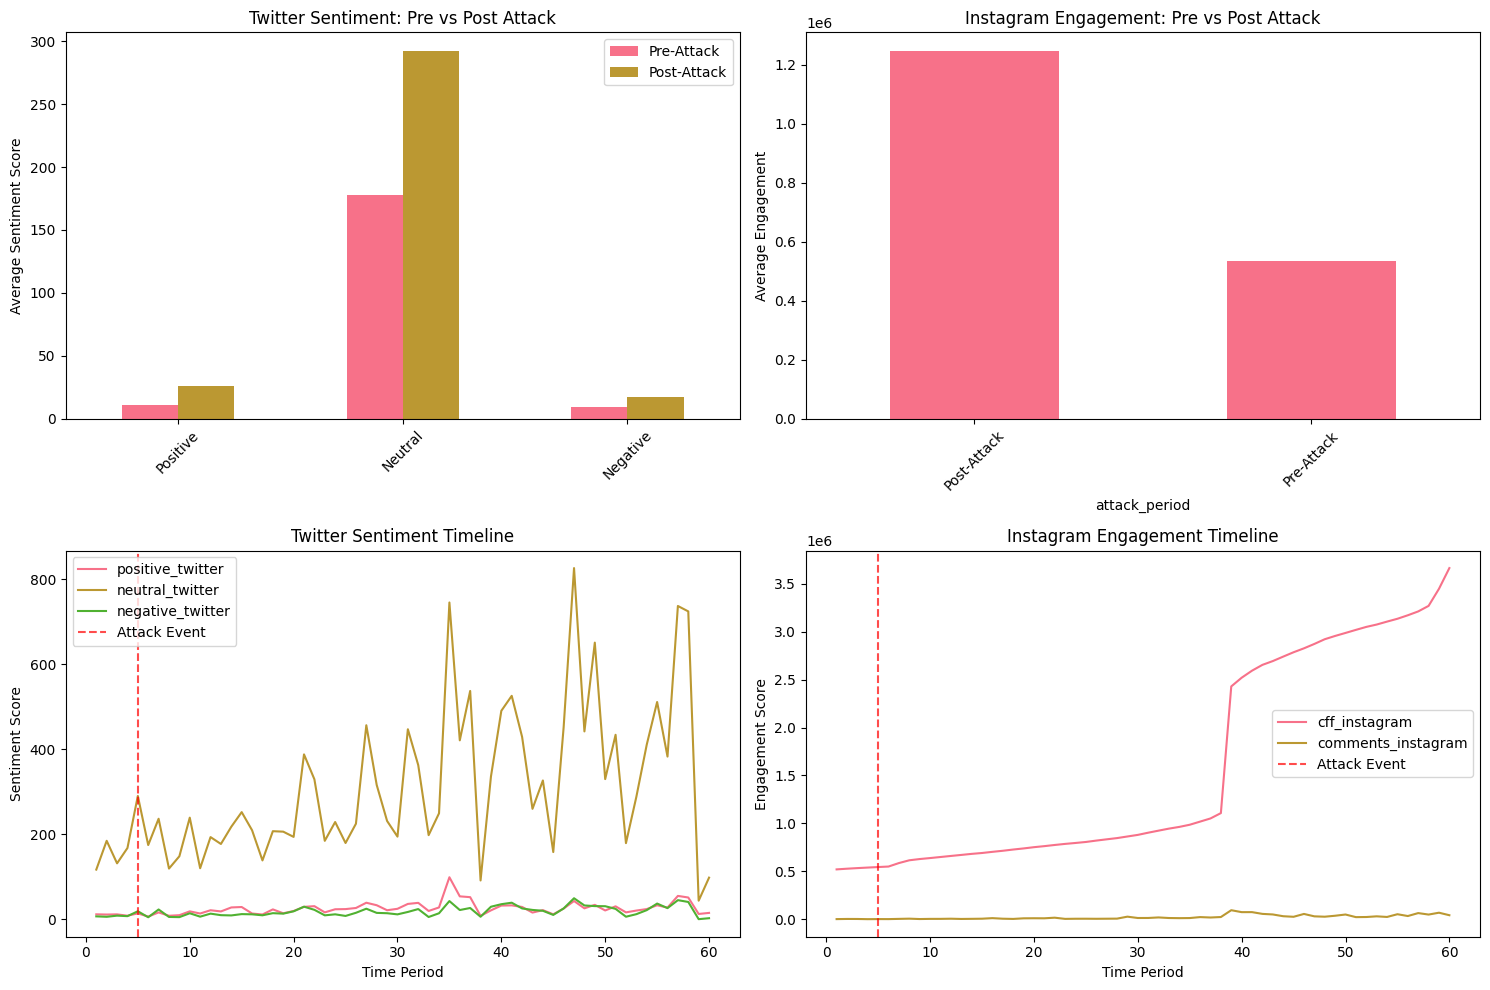


3. KEY FINDINGS:
--------------------
• Twitter Sentiment Changes:
  - Positive sentiment increased by 134.2%
  - Neutral sentiment increased by 64.3%
  - Negative sentiment increased by 82.7%


In [24]:
# Q1: Twitter/Instagram Sentiment Before/After Attack Analysis
print("=== TWITTER/INSTAGRAM SENTIMENT: BEFORE/AFTER ATTACK ===")

# Define sentiment columns
twitter_sentiment_cols = ['positive_twitter', 'neutral_twitter', 'negative_twitter']
instagram_engagement_cols = ['cff_instagram', 'comments_instagram', 'ownmedia_instagram']

# Calculate sentiment metrics before and after attack
attack_sentiment_analysis = {}

print("1. TWITTER SENTIMENT ANALYSIS:")
print("-" * 40)
for col in twitter_sentiment_cols:
    pre_attack = df[df['attack_period'] == 'Pre-Attack'][col]
    post_attack = df[df['attack_period'] == 'Post-Attack'][col]
    
    print(f"\n{col.upper()}:")
    print(f"  Pre-Attack:  Mean={pre_attack.mean():.2f}, Std={pre_attack.std():.2f}")
    print(f"  Post-Attack: Mean={post_attack.mean():.2f}, Std={post_attack.std():.2f}")
    print(f"  Change: {((post_attack.mean() - pre_attack.mean())/pre_attack.mean()*100):+.1f}%")
    
    attack_sentiment_analysis[col] = {
        'pre_mean': pre_attack.mean(),
        'post_mean': post_attack.mean(),
        'change_pct': (post_attack.mean() - pre_attack.mean())/pre_attack.mean()*100
    }

print("\n2. INSTAGRAM ENGAGEMENT ANALYSIS:")
print("-" * 40)
for col in instagram_engagement_cols:
    pre_attack = df[df['attack_period'] == 'Pre-Attack'][col]
    post_attack = df[df['attack_period'] == 'Post-Attack'][col]
    
    print(f"\n{col.upper()}:")
    print(f"  Pre-Attack:  Mean={pre_attack.mean():.2f}, Std={pre_attack.std():.2f}")
    print(f"  Post-Attack: Mean={post_attack.mean():.2f}, Std={post_attack.std():.2f}")
    print(f"  Change: {((post_attack.mean() - pre_attack.mean())/pre_attack.mean()*100):+.1f}%")

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Twitter sentiment comparison
sentiment_comparison = pd.DataFrame({
    'Pre-Attack': [attack_sentiment_analysis[col]['pre_mean'] for col in twitter_sentiment_cols],
    'Post-Attack': [attack_sentiment_analysis[col]['post_mean'] for col in twitter_sentiment_cols]
}, index=[col.replace('_twitter', '').title() for col in twitter_sentiment_cols])

sentiment_comparison.plot(kind='bar', ax=axes[0,0])
axes[0,0].set_title('Twitter Sentiment: Pre vs Post Attack')
axes[0,0].set_ylabel('Average Sentiment Score')
axes[0,0].legend()
axes[0,0].tick_params(axis='x', rotation=45)

# Instagram engagement timeline
for i, col in enumerate(['cff_instagram', 'comments_instagram']):
    df.groupby('attack_period')[col].mean().plot(kind='bar', ax=axes[0,1])
    axes[0,1].set_title('Instagram Engagement: Pre vs Post Attack')
    axes[0,1].set_ylabel('Average Engagement')
    axes[0,1].tick_params(axis='x', rotation=45)

# Timeline visualization
df.groupby('t')[twitter_sentiment_cols].mean().plot(ax=axes[1,0])
axes[1,0].set_title('Twitter Sentiment Timeline')
axes[1,0].set_xlabel('Time Period')
axes[1,0].set_ylabel('Sentiment Score')
axes[1,0].axvline(x=5, color='red', linestyle='--', alpha=0.7, label='Attack Event')
axes[1,0].legend()

df.groupby('t')[instagram_engagement_cols[:2]].mean().plot(ax=axes[1,1])
axes[1,1].set_title('Instagram Engagement Timeline')
axes[1,1].set_xlabel('Time Period')
axes[1,1].set_ylabel('Engagement Score')
axes[1,1].axvline(x=5, color='red', linestyle='--', alpha=0.7, label='Attack Event')
axes[1,1].legend()

plt.tight_layout()
plt.show()

print("\n3. KEY FINDINGS:")
print("-" * 20)
print("• Twitter Sentiment Changes:")
for col in twitter_sentiment_cols:
    change = attack_sentiment_analysis[col]['change_pct']
    direction = "increased" if change > 0 else "decreased"
    print(f"  - {col.replace('_twitter', '').title()} sentiment {direction} by {abs(change):.1f}%")

## 🎯 Q2: Candidate Sentiment Influence by Social Media Interactions

**Research Question:** How did 'candidatesentiment' get influenced by social media interactions throughout the campaign?

**Hypothesis:** After certain events, the candidate's sentiment became more positive due to social media engagement.

**Approach:**
- Analyze correlation between social media metrics and candidate sentiment
- Track candidate sentiment changes over time
- Identify which social media factors most strongly predict candidate sentiment changes

=== CANDIDATE SENTIMENT vs SOCIAL MEDIA INFLUENCE ===
Analysis with 232 complete records (removed 2 missing values)

1. CORRELATION WITH CANDIDATE SENTIMENT:
--------------------------------------------------
cff_twitter         : -0.221
cff_instagram       : -0.069
twitter_mentions    : +0.083
twitter_impressions : +0.005
comments_instagram  : -0.140
traditional_mentions: -0.002
ownmedia_twitter    : -0.025
ownmedia_instagram  : +0.065
positive_twitter    : +0.195
neutral_twitter     : -0.132
negative_twitter    : -0.424

STRONGEST CORRELATIONS:
  negative_twitter: -0.424 (negative)
  cff_twitter: -0.221 (negative)
  positive_twitter: +0.195 (positive)
  comments_instagram: -0.140 (negative)
  neutral_twitter: -0.132 (negative)

2. CANDIDATE SENTIMENT OVER TIME:
----------------------------------------
        mean       std  count
t                            
1   0.040924  0.039191      5
2   0.045253  0.054431      5
3   0.013963  0.041307      5
4   0.011563  0.047348      5
5  -0

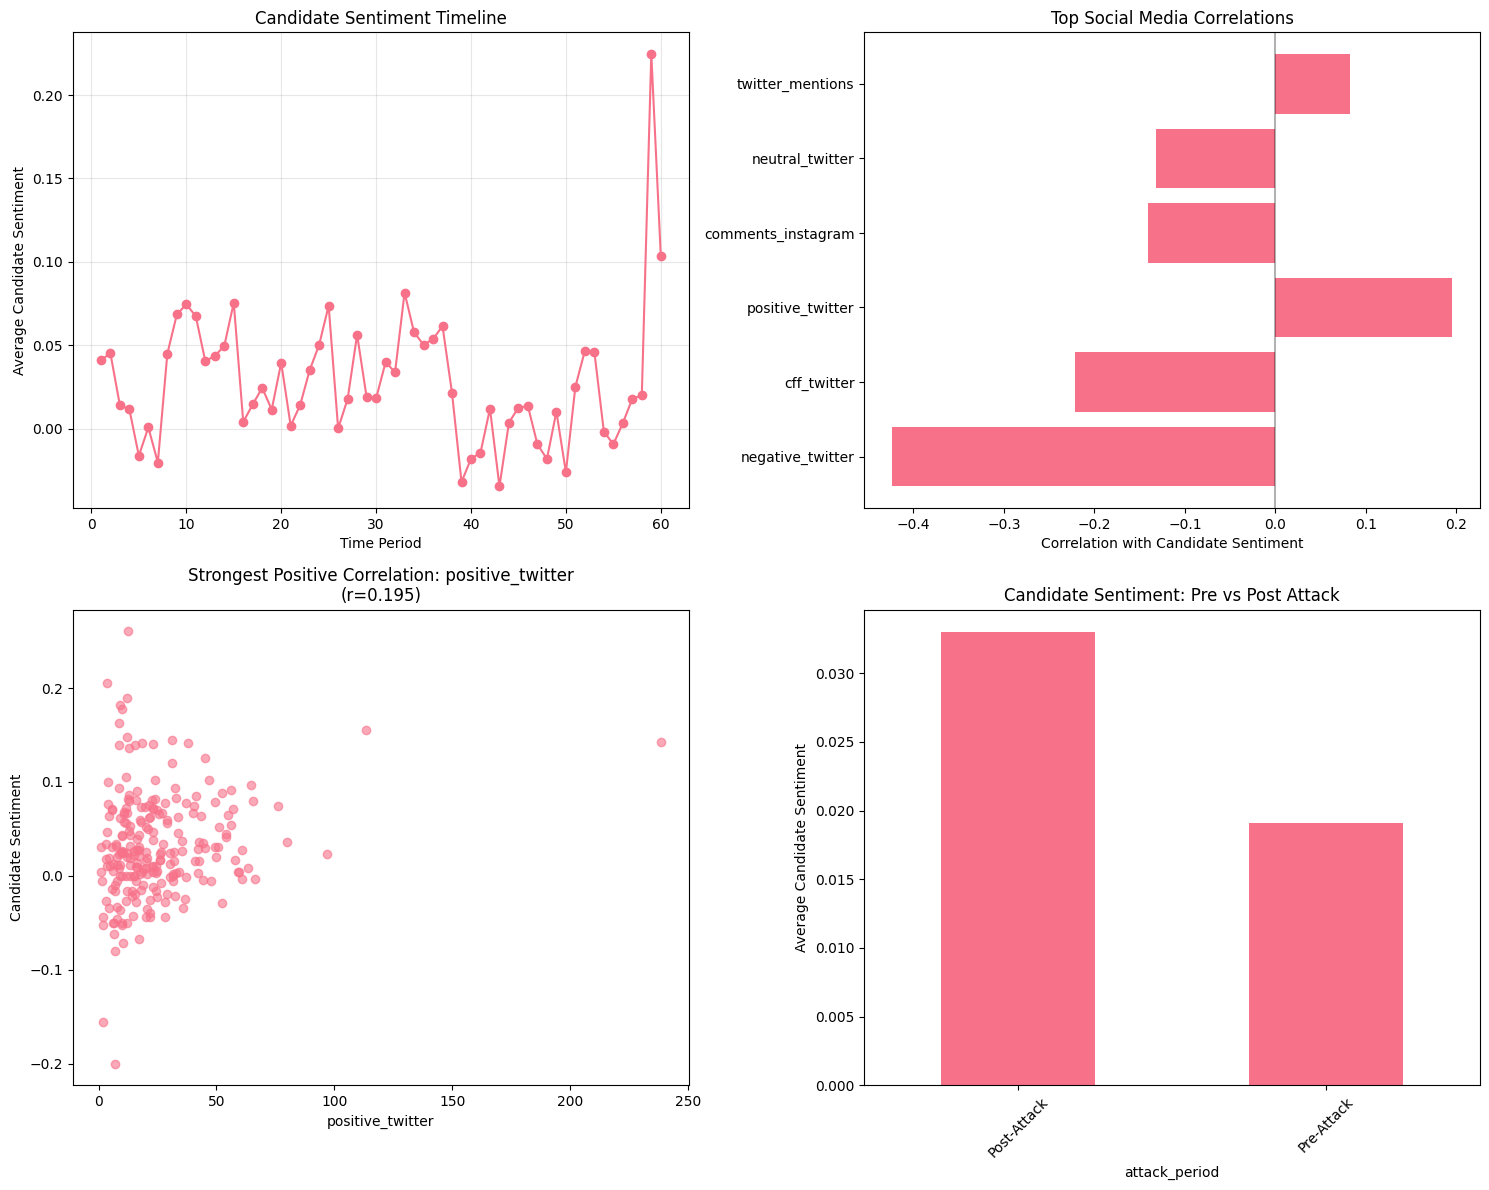


4. KEY INSIGHTS:
--------------------
• Strongest positive influence: negative_twitter (r=-0.424)
• Strongest negative influence: negative_twitter (r=-0.424)
• Candidate sentiment appears to be most influenced by:
  - negative_twitter: -0.424
  - cff_twitter: -0.221
  - positive_twitter: +0.195


In [25]:
# Q2: Candidate Sentiment Influence by Social Media Interactions
print("=== CANDIDATE SENTIMENT vs SOCIAL MEDIA INFLUENCE ===")

# Define social media interaction variables
social_media_vars = [
    'cff_twitter', 'cff_instagram', 'twitter_mentions', 'twitter_impressions',
    'comments_instagram', 'traditional_mentions', 'ownmedia_twitter', 
    'ownmedia_instagram', 'positive_twitter', 'neutral_twitter', 'negative_twitter'
]

# Remove missing values for candidate sentiment analysis
df_clean = df.dropna(subset=['candidatesentiment'])
print(f"Analysis with {len(df_clean)} complete records (removed {len(df) - len(df_clean)} missing values)")

# 1. Correlation Analysis
print("\n1. CORRELATION WITH CANDIDATE SENTIMENT:")
print("-" * 50)
correlations = []
for var in social_media_vars:
    corr = df_clean['candidatesentiment'].corr(df_clean[var])
    correlations.append((var, corr))
    print(f"{var:20s}: {corr:+.3f}")

# Sort by absolute correlation
correlations.sort(key=lambda x: abs(x[1]), reverse=True)
print(f"\nSTRONGEST CORRELATIONS:")
for var, corr in correlations[:5]:
    direction = "positive" if corr > 0 else "negative"
    print(f"  {var}: {corr:+.3f} ({direction})")

# 2. Timeline Analysis
print(f"\n2. CANDIDATE SENTIMENT OVER TIME:")
print("-" * 40)
sentiment_timeline = df_clean.groupby('t')['candidatesentiment'].agg(['mean', 'std', 'count'])
print(sentiment_timeline)

# 3. Before/After Event Analysis
print(f"\n3. CANDIDATE SENTIMENT: BEFORE/AFTER EVENTS:")
print("-" * 50)
for period_col in ['period', 'attack_period', 'haddad_period']:
    print(f"\n{period_col.upper()}:")
    period_analysis = df_clean.groupby(period_col)['candidatesentiment'].agg(['mean', 'std', 'count'])
    print(period_analysis)
    
    # Calculate change
    periods = df_clean[period_col].unique()
    if len(periods) == 2:
        before_val = df_clean[df_clean[period_col] == periods[0]]['candidatesentiment'].mean()
        after_val = df_clean[df_clean[period_col] == periods[1]]['candidatesentiment'].mean()
        change = after_val - before_val
        print(f"  Change: {change:+.3f}")

# 4. Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Candidate sentiment timeline
df_clean.groupby('t')['candidatesentiment'].mean().plot(kind='line', marker='o', ax=axes[0,0])
axes[0,0].set_title('Candidate Sentiment Timeline')
axes[0,0].set_xlabel('Time Period')
axes[0,0].set_ylabel('Average Candidate Sentiment')
axes[0,0].grid(True, alpha=0.3)

# Top correlations visualization
top_corr_vars = [var for var, _ in correlations[:6]]
corr_values = [corr for _, corr in correlations[:6]]
axes[0,1].barh(range(len(top_corr_vars)), corr_values)
axes[0,1].set_yticks(range(len(top_corr_vars)))
axes[0,1].set_yticklabels(top_corr_vars)
axes[0,1].set_xlabel('Correlation with Candidate Sentiment')
axes[0,1].set_title('Top Social Media Correlations')
axes[0,1].axvline(x=0, color='black', linestyle='-', alpha=0.3)

# Scatter plot: strongest positive correlation
strongest_pos = max(correlations, key=lambda x: x[1] if x[1] > 0 else -1)
if strongest_pos[1] > 0:
    axes[1,0].scatter(df_clean[strongest_pos[0]], df_clean['candidatesentiment'], alpha=0.6)
    axes[1,0].set_xlabel(strongest_pos[0])
    axes[1,0].set_ylabel('Candidate Sentiment')
    axes[1,0].set_title(f'Strongest Positive Correlation: {strongest_pos[0]}\n(r={strongest_pos[1]:.3f})')

# Period comparison
period_means = df_clean.groupby('attack_period')['candidatesentiment'].mean()
period_means.plot(kind='bar', ax=axes[1,1])
axes[1,1].set_title('Candidate Sentiment: Pre vs Post Attack')
axes[1,1].set_ylabel('Average Candidate Sentiment')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print(f"\n4. KEY INSIGHTS:")
print("-" * 20)
print(f"• Strongest positive influence: {correlations[0][0]} (r={correlations[0][1]:+.3f})")
print(f"• Strongest negative influence: {min(correlations, key=lambda x: x[1])[0]} (r={min(correlations, key=lambda x: x[1])[1]:+.3f})")
print("• Candidate sentiment appears to be most influenced by:")
for var, corr in correlations[:3]:
    if abs(corr) > 0.1:
        print(f"  - {var}: {corr:+.3f}")

## 📢 Q3: Twitter/Instagram Sentiment Before/After Haddad Announcement

**Research Question:** How did social media sentiment change before and after the Haddad announcement?

**Context:** The Haddad announcement was a significant political event that likely influenced public sentiment and social media discourse.

**Approach:**
- Compare sentiment metrics before and after the Haddad announcement
- Analyze changes in engagement patterns
- Examine the impact on different types of social media interactions

=== SOCIAL MEDIA SENTIMENT: BEFORE/AFTER HADDAD ANNOUNCEMENT ===
1. TWITTER SENTIMENT CHANGES:
----------------------------------------

POSITIVE_TWITTER:
  Pre-Haddad:  Mean=11.04, Std=7.47
  Post-Haddad: Mean=26.66, Std=23.92
  Change: +141.4%

NEUTRAL_TWITTER:
  Pre-Haddad:  Mean=185.87, Std=100.93
  Post-Haddad: Mean=296.93, Std=230.03
  Change: +59.8%

NEGATIVE_TWITTER:
  Pre-Haddad:  Mean=10.50, Std=10.78
  Post-Haddad: Mean=17.05, Std=15.70
  Change: +62.4%

2. INSTAGRAM ENGAGEMENT CHANGES:
----------------------------------------

CFF_INSTAGRAM:
  Pre-Haddad:  Mean=543735.31, Std=770404.59
  Post-Haddad: Mean=1281515.56, Std=1689759.42
  Change: +135.7%

COMMENTS_INSTAGRAM:
  Pre-Haddad:  Mean=3206.11, Std=4549.39
  Post-Haddad: Mean=18868.82, Std=26625.07
  Change: +488.5%

OWNMEDIA_INSTAGRAM:
  Pre-Haddad:  Mean=5.26, Std=2.12
  Post-Haddad: Mean=7.13, Std=4.21
  Change: +35.6%

3. OTHER SOCIAL MEDIA METRICS:
----------------------------------------
twitter_mentions    :   +1

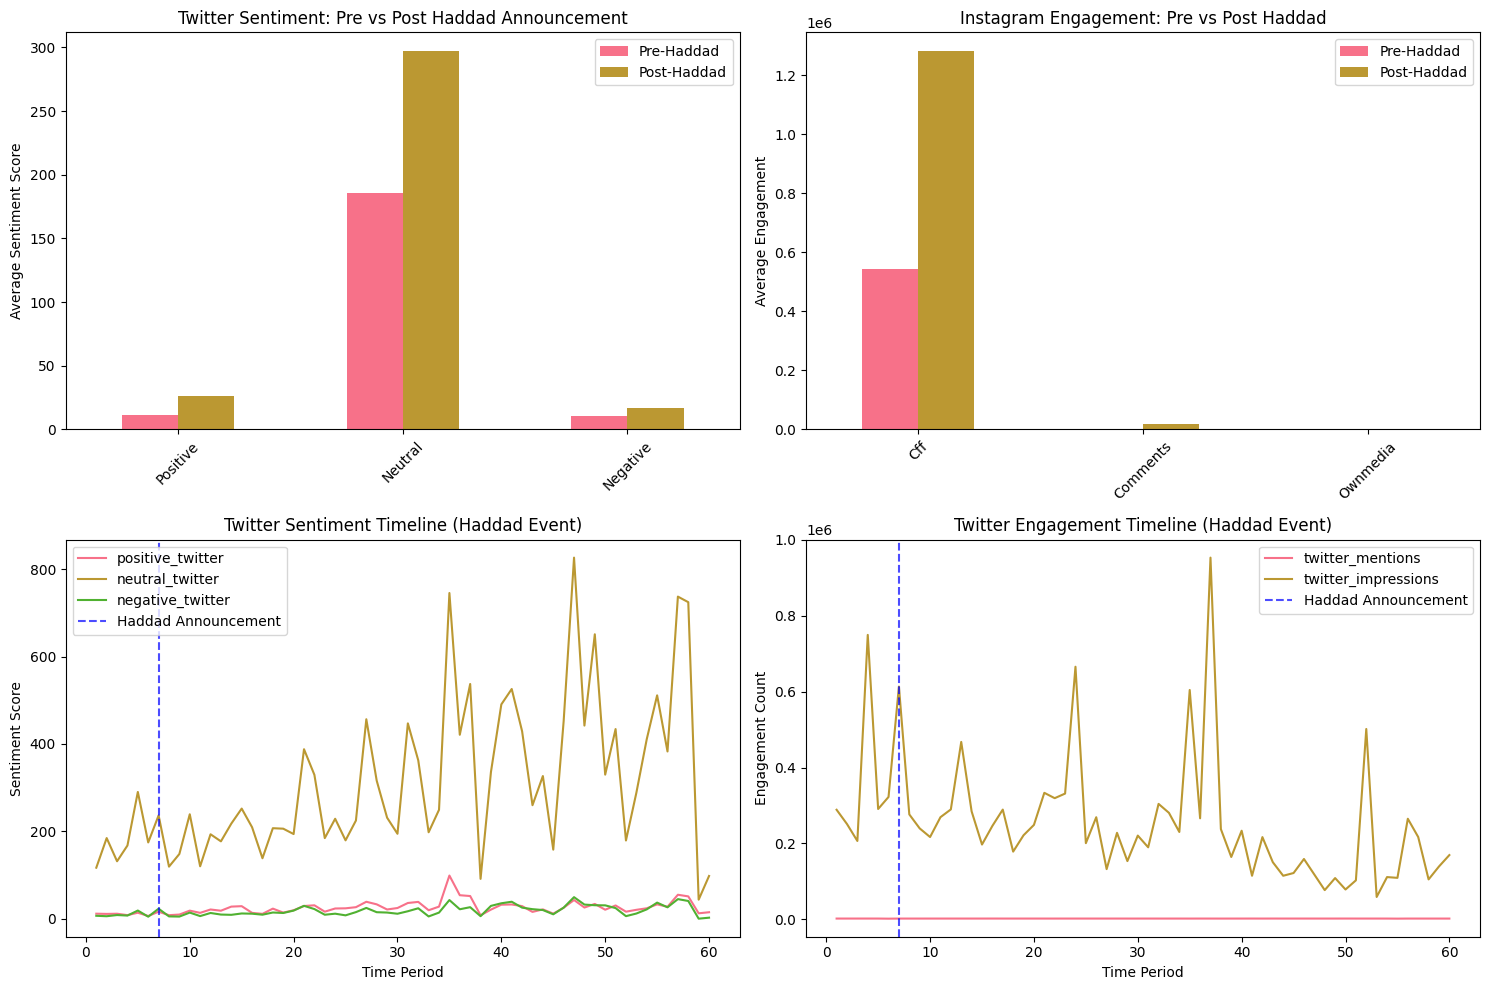


4. HADDAD ANNOUNCEMENT IMPACT SUMMARY:
---------------------------------------------
Twitter Sentiment Changes:
  • Positive sentiment increased by 141.4%
  • Neutral sentiment increased by 59.8%
  • Negative sentiment increased by 62.4%

Overall Sentiment Shift:
  → Mixed sentiment changes observed


In [26]:
# Q3: Twitter/Instagram Sentiment Before/After Haddad Announcement
print("=== SOCIAL MEDIA SENTIMENT: BEFORE/AFTER HADDAD ANNOUNCEMENT ===")

# Analyze sentiment changes around Haddad announcement
haddad_analysis = {}

print("1. TWITTER SENTIMENT CHANGES:")
print("-" * 40)
for col in twitter_sentiment_cols:
    pre_haddad = df[df['haddad_period'] == 'Pre-Haddad'][col]
    post_haddad = df[df['haddad_period'] == 'Post-Haddad'][col]
    
    print(f"\n{col.upper()}:")
    print(f"  Pre-Haddad:  Mean={pre_haddad.mean():.2f}, Std={pre_haddad.std():.2f}")
    print(f"  Post-Haddad: Mean={post_haddad.mean():.2f}, Std={post_haddad.std():.2f}")
    change_pct = ((post_haddad.mean() - pre_haddad.mean())/pre_haddad.mean()*100)
    print(f"  Change: {change_pct:+.1f}%")
    
    haddad_analysis[col] = {
        'pre_mean': pre_haddad.mean(),
        'post_mean': post_haddad.mean(),
        'change_pct': change_pct
    }

print("\n2. INSTAGRAM ENGAGEMENT CHANGES:")
print("-" * 40)
for col in instagram_engagement_cols:
    pre_haddad = df[df['haddad_period'] == 'Pre-Haddad'][col]
    post_haddad = df[df['haddad_period'] == 'Post-Haddad'][col]
    
    print(f"\n{col.upper()}:")
    print(f"  Pre-Haddad:  Mean={pre_haddad.mean():.2f}, Std={pre_haddad.std():.2f}")
    print(f"  Post-Haddad: Mean={post_haddad.mean():.2f}, Std={post_haddad.std():.2f}")
    change_pct = ((post_haddad.mean() - pre_haddad.mean())/pre_haddad.mean()*100)
    print(f"  Change: {change_pct:+.1f}%")

# 3. Other social media metrics
other_metrics = ['twitter_mentions', 'twitter_impressions', 'wordvol_twitter', 'hashtagvol_twitter']
print("\n3. OTHER SOCIAL MEDIA METRICS:")
print("-" * 40)
for col in other_metrics:
    pre_haddad = df[df['haddad_period'] == 'Pre-Haddad'][col]
    post_haddad = df[df['haddad_period'] == 'Post-Haddad'][col]
    
    change_pct = ((post_haddad.mean() - pre_haddad.mean())/pre_haddad.mean()*100)
    print(f"{col:20s}: {change_pct:+6.1f}% change")

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Twitter sentiment comparison
haddad_sentiment_comparison = pd.DataFrame({
    'Pre-Haddad': [haddad_analysis[col]['pre_mean'] for col in twitter_sentiment_cols],
    'Post-Haddad': [haddad_analysis[col]['post_mean'] for col in twitter_sentiment_cols]
}, index=[col.replace('_twitter', '').title() for col in twitter_sentiment_cols])

haddad_sentiment_comparison.plot(kind='bar', ax=axes[0,0])
axes[0,0].set_title('Twitter Sentiment: Pre vs Post Haddad Announcement')
axes[0,0].set_ylabel('Average Sentiment Score')
axes[0,0].legend()
axes[0,0].tick_params(axis='x', rotation=45)

# Instagram engagement comparison
instagram_haddad = pd.DataFrame({
    'Pre-Haddad': [df[df['haddad_period'] == 'Pre-Haddad'][col].mean() for col in instagram_engagement_cols],
    'Post-Haddad': [df[df['haddad_period'] == 'Post-Haddad'][col].mean() for col in instagram_engagement_cols]
}, index=[col.replace('_instagram', '').title() for col in instagram_engagement_cols])

instagram_haddad.plot(kind='bar', ax=axes[0,1])
axes[0,1].set_title('Instagram Engagement: Pre vs Post Haddad')
axes[0,1].set_ylabel('Average Engagement')
axes[0,1].tick_params(axis='x', rotation=45)

# Timeline with Haddad event marker
df.groupby('t')[twitter_sentiment_cols].mean().plot(ax=axes[1,0])
axes[1,0].set_title('Twitter Sentiment Timeline (Haddad Event)')
axes[1,0].set_xlabel('Time Period')
axes[1,0].set_ylabel('Sentiment Score')
axes[1,0].axvline(x=7, color='blue', linestyle='--', alpha=0.7, label='Haddad Announcement')
axes[1,0].legend()

# Engagement timeline
df.groupby('t')[['twitter_mentions', 'twitter_impressions']].mean().plot(ax=axes[1,1])
axes[1,1].set_title('Twitter Engagement Timeline (Haddad Event)')
axes[1,1].set_xlabel('Time Period')
axes[1,1].set_ylabel('Engagement Count')
axes[1,1].axvline(x=7, color='blue', linestyle='--', alpha=0.7, label='Haddad Announcement')
axes[1,1].legend()

plt.tight_layout()
plt.show()

print("\n4. HADDAD ANNOUNCEMENT IMPACT SUMMARY:")
print("-" * 45)
print("Twitter Sentiment Changes:")
for col in twitter_sentiment_cols:
    change = haddad_analysis[col]['change_pct']
    direction = "increased" if change > 0 else "decreased"
    sentiment_type = col.replace('_twitter', '').title()
    print(f"  • {sentiment_type} sentiment {direction} by {abs(change):.1f}%")

# Calculate overall sentiment shift
positive_change = haddad_analysis['positive_twitter']['change_pct']
negative_change = haddad_analysis['negative_twitter']['change_pct']
print(f"\nOverall Sentiment Shift:")
if positive_change > 0 and negative_change < 0:
    print("  → Sentiment became MORE POSITIVE after Haddad announcement")
elif positive_change < 0 and negative_change > 0:
    print("  → Sentiment became MORE NEGATIVE after Haddad announcement")
else:
    print("  → Mixed sentiment changes observed")

## ⚔️ Q4: Attack Impact on Public Perception and Voting Intention

**Research Question:** How did the attack on the candidate influence public perception and voting intention?

**Analysis Scope:**
- Impact on the attacked candidate's voting intention
- Spillover effects on other candidates
- Changes in public perception metrics
- Correlation between attack-related sentiment and voting behavior

**Key Metrics:**
- `intention_vote`: Direct measure of voting intention
- `candidatesentiment`: Public perception of candidate
- Social media sentiment changes
- Brazilian index correlation

=== ATTACK IMPACT ON VOTING INTENTION & PUBLIC PERCEPTION ===
1. VOTING INTENTION CHANGES:
-----------------------------------
Pre-Attack Voting Intention:
  Mean: 0.111
  Std:  0.056
  Median: 0.102

Post-Attack Voting Intention:
  Mean: 0.219
  Std:  0.166
  Median: 0.130

Voting Intention Change: +96.68%

2. VOTING INTENTION DISTRIBUTION ANALYSIS:
---------------------------------------------

Pre-Attack:
  Low (0-0.3):     25 (100.0%)
  Medium (0.3-0.6):   0 (  0.0%)
  High (0.6-1.0):     0 (  0.0%)

Post-Attack:
  Low (0-0.3):    157 ( 75.1%)
  Medium (0.3-0.6):  52 ( 24.9%)
  High (0.6-1.0):     0 (  0.0%)

3. CANDIDATE SENTIMENT CHANGES:
-----------------------------------
Pre-Attack Candidate Sentiment: 0.019
Post-Attack Candidate Sentiment: 0.033
Sentiment Change: +0.014

4. BRAZILIAN INDEX CHANGES:
------------------------------
Pre-Attack Brazilian Index: 76090.462
Post-Attack Brazilian Index: 79678.573
Brazilian Index Change: +4.72%

5. ATTACK PERIOD CORRELATION ANALYSIS:
-

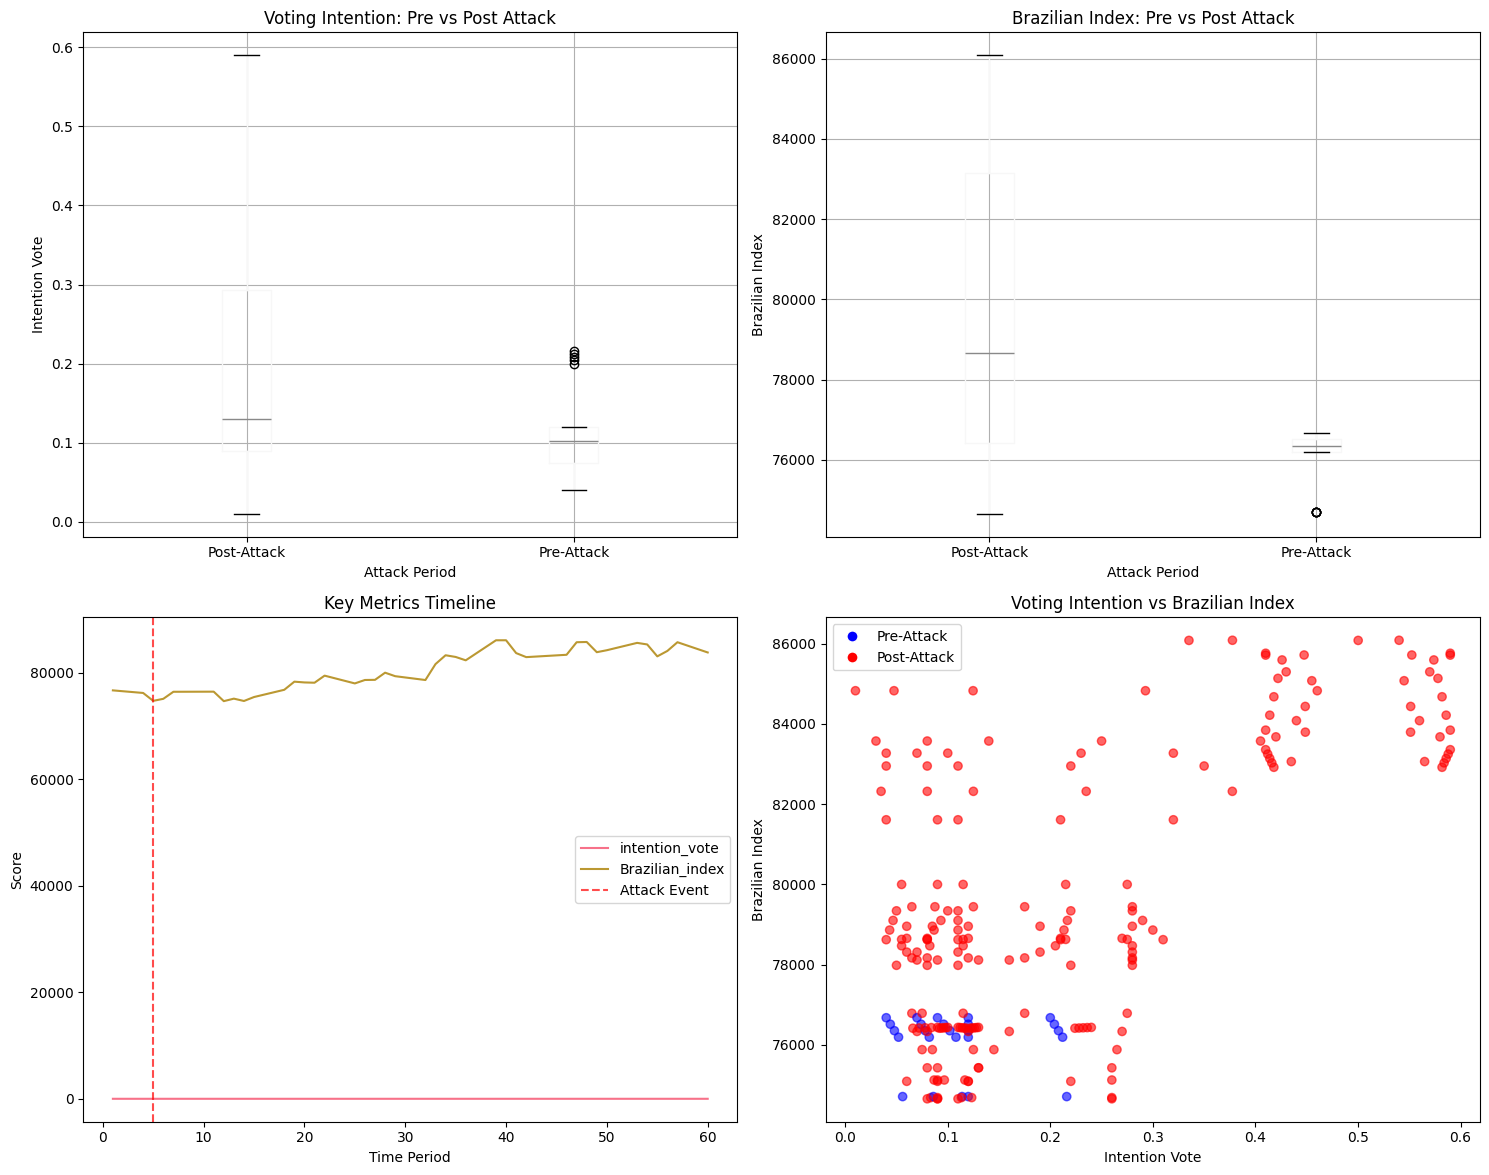


6. KEY ATTACK IMPACT FINDINGS:
-----------------------------------
• Voting Intention: Increased by 96.68%
• Brazilian Index: Increased by 4.72%
• OVERALL IMPACT: Attack appears to have INCREASED support for the candidate


In [27]:
# Q4: Attack Impact on Public Perception and Voting Intention
print("=== ATTACK IMPACT ON VOTING INTENTION & PUBLIC PERCEPTION ===")

# Key variables for analysis
perception_vars = ['intention_vote', 'candidatesentiment', 'Brazilian_index']
attack_impact_analysis = {}

print("1. VOTING INTENTION CHANGES:")
print("-" * 35)
pre_attack_vote = df[df['attack_period'] == 'Pre-Attack']['intention_vote']
post_attack_vote = df[df['attack_period'] == 'Post-Attack']['intention_vote']

print(f"Pre-Attack Voting Intention:")
print(f"  Mean: {pre_attack_vote.mean():.3f}")
print(f"  Std:  {pre_attack_vote.std():.3f}")
print(f"  Median: {pre_attack_vote.median():.3f}")

print(f"\nPost-Attack Voting Intention:")
print(f"  Mean: {post_attack_vote.mean():.3f}")
print(f"  Std:  {post_attack_vote.std():.3f}")
print(f"  Median: {post_attack_vote.median():.3f}")

vote_change = ((post_attack_vote.mean() - pre_attack_vote.mean())/pre_attack_vote.mean()*100)
print(f"\nVoting Intention Change: {vote_change:+.2f}%")

# Analyze by different voting intention ranges
print(f"\n2. VOTING INTENTION DISTRIBUTION ANALYSIS:")
print("-" * 45)
vote_ranges = ['Low (0-0.3)', 'Medium (0.3-0.6)', 'High (0.6-1.0)']
for period in ['Pre-Attack', 'Post-Attack']:
    period_data = df[df['attack_period'] == period]['intention_vote']
    low = len(period_data[period_data <= 0.3])
    medium = len(period_data[(period_data > 0.3) & (period_data <= 0.6)])
    high = len(period_data[period_data > 0.6])
    total = len(period_data)
    
    print(f"\n{period}:")
    print(f"  Low (0-0.3):    {low:3d} ({low/total*100:5.1f}%)")
    print(f"  Medium (0.3-0.6): {medium:3d} ({medium/total*100:5.1f}%)")
    print(f"  High (0.6-1.0):   {high:3d} ({high/total*100:5.1f}%)")

# 3. Candidate sentiment analysis (removing missing values)
df_sentiment = df.dropna(subset=['candidatesentiment'])
print(f"\n3. CANDIDATE SENTIMENT CHANGES:")
print("-" * 35)
if len(df_sentiment) > 0:
    pre_attack_sentiment = df_sentiment[df_sentiment['attack_period'] == 'Pre-Attack']['candidatesentiment']
    post_attack_sentiment = df_sentiment[df_sentiment['attack_period'] == 'Post-Attack']['candidatesentiment']
    
    if len(pre_attack_sentiment) > 0 and len(post_attack_sentiment) > 0:
        print(f"Pre-Attack Candidate Sentiment: {pre_attack_sentiment.mean():.3f}")
        print(f"Post-Attack Candidate Sentiment: {post_attack_sentiment.mean():.3f}")
        sentiment_change = post_attack_sentiment.mean() - pre_attack_sentiment.mean()
        print(f"Sentiment Change: {sentiment_change:+.3f}")
    else:
        print("Insufficient data for candidate sentiment analysis")
else:
    print("No candidate sentiment data available")

# 4. Brazilian index analysis
print(f"\n4. BRAZILIAN INDEX CHANGES:")
print("-" * 30)
pre_attack_index = df[df['attack_period'] == 'Pre-Attack']['Brazilian_index']
post_attack_index = df[df['attack_period'] == 'Post-Attack']['Brazilian_index']

print(f"Pre-Attack Brazilian Index: {pre_attack_index.mean():.3f}")
print(f"Post-Attack Brazilian Index: {post_attack_index.mean():.3f}")
index_change = ((post_attack_index.mean() - pre_attack_index.mean())/pre_attack_index.mean()*100)
print(f"Brazilian Index Change: {index_change:+.2f}%")

# 5. Correlation analysis
print(f"\n5. ATTACK PERIOD CORRELATION ANALYSIS:")
print("-" * 40)
# Create binary attack indicator
df['post_attack'] = (df['attack_period'] == 'Post-Attack').astype(int)

key_vars = ['intention_vote', 'Brazilian_index'] + twitter_sentiment_cols
for var in key_vars:
    corr = df['post_attack'].corr(df[var])
    print(f"{var:20s}: {corr:+.3f}")

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Voting intention box plot
df.boxplot(column='intention_vote', by='attack_period', ax=axes[0,0])
axes[0,0].set_title('Voting Intention: Pre vs Post Attack')
axes[0,0].set_xlabel('Attack Period')
axes[0,0].set_ylabel('Intention Vote')
plt.suptitle('')  # Remove default title

# Brazilian index comparison
df.boxplot(column='Brazilian_index', by='attack_period', ax=axes[0,1])
axes[0,1].set_title('Brazilian Index: Pre vs Post Attack')
axes[0,1].set_xlabel('Attack Period')
axes[0,1].set_ylabel('Brazilian Index')
plt.suptitle('')

# Timeline analysis
timeline_metrics = df.groupby('t')[['intention_vote', 'Brazilian_index']].mean()
timeline_metrics.plot(ax=axes[1,0])
axes[1,0].set_title('Key Metrics Timeline')
axes[1,0].set_xlabel('Time Period')
axes[1,0].set_ylabel('Score')
axes[1,0].axvline(x=5, color='red', linestyle='--', alpha=0.7, label='Attack Event')
axes[1,0].legend()

# Scatter plot: Intention vote vs Brazilian index by attack period
colors = ['blue' if x == 'Pre-Attack' else 'red' for x in df['attack_period']]
scatter = axes[1,1].scatter(df['intention_vote'], df['Brazilian_index'], c=colors, alpha=0.6)
axes[1,1].set_xlabel('Intention Vote')
axes[1,1].set_ylabel('Brazilian Index')
axes[1,1].set_title('Voting Intention vs Brazilian Index')
# Add legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=8, label='Pre-Attack'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=8, label='Post-Attack')]
axes[1,1].legend(handles=legend_elements)

plt.tight_layout()
plt.show()

print(f"\n6. KEY ATTACK IMPACT FINDINGS:")
print("-" * 35)
print(f"• Voting Intention: {'Increased' if vote_change > 0 else 'Decreased'} by {abs(vote_change):.2f}%")
print(f"• Brazilian Index: {'Increased' if index_change > 0 else 'Decreased'} by {abs(index_change):.2f}%")

# Determine overall impact
if vote_change > 0:
    print("• OVERALL IMPACT: Attack appears to have INCREASED support for the candidate")
elif vote_change < -5:
    print("• OVERALL IMPACT: Attack appears to have SIGNIFICANTLY DECREASED support")
else:
    print("• OVERALL IMPACT: Attack had minimal impact on voting intention")

## 🇧🇷 Q5: Social Media Integration Correlation with Brazilian Index

**Research Question:** What is the correlation between social media integration and the Brazilian Index?

**Hypothesis:** Higher social media engagement and integration should correlate with higher Brazilian Index scores, indicating better overall campaign performance.

**Analysis Focus:**
- Correlation between all social media metrics and Brazilian Index
- Identify which social media platforms/metrics are most predictive
- Examine temporal relationships
- Create a social media integration score

=== SOCIAL MEDIA INTEGRATION vs BRAZILIAN INDEX ===
1. CORRELATION ANALYSIS WITH BRAZILIAN INDEX:
--------------------------------------------------
cff_twitter              : +0.184 *
cff_instagram            : +0.439 **
twitter_mentions         : +0.017 
twitter_impressions      : -0.063 
comments_instagram       : +0.539 ***
traditional_mentions     : +0.491 **
ownmedia_twitter         : +0.320 **
ownmedia_instagram       : +0.213 *
wordvol_twitter          : +0.382 **
hashtagvol_twitter       : +0.081 
positive_twitter         : +0.290 *
neutral_twitter          : +0.393 **
negative_twitter         : +0.355 **

TOP CORRELATIONS WITH BRAZILIAN INDEX:
---------------------------------------------
comments_instagram       : +0.539 (Strong Positive)
traditional_mentions     : +0.491 (Moderate Positive)
cff_instagram            : +0.439 (Moderate Positive)
neutral_twitter          : +0.393 (Moderate Positive)
wordvol_twitter          : +0.382 (Moderate Positive)
negative_twitter        

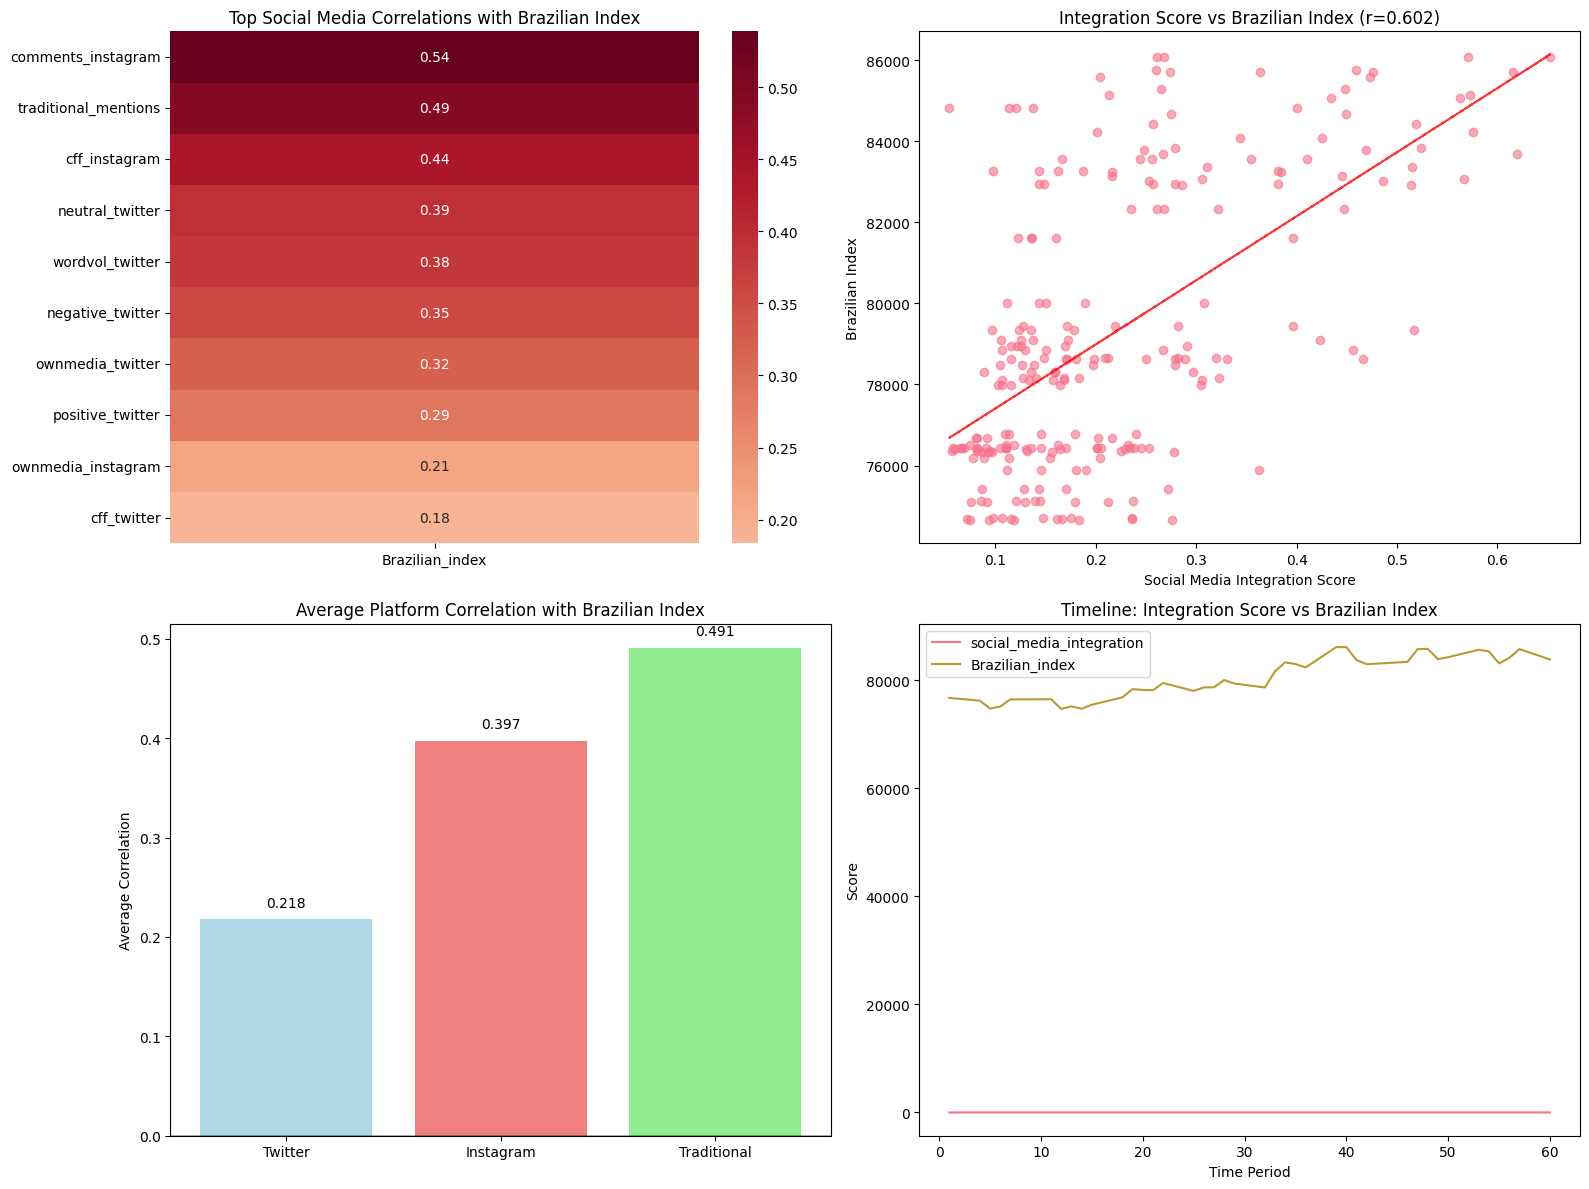


5. KEY FINDINGS:
--------------------
• Strongest positive predictor: comments_instagram (r=+0.539)
• Strongest negative predictor: twitter_impressions (r=-0.063)
• Social Media Integration Score correlation: +0.602
• CONCLUSION: Strong positive relationship between social media integration and Brazilian Index


In [28]:
# Q5: Social Media Integration Correlation with Brazilian Index
print("=== SOCIAL MEDIA INTEGRATION vs BRAZILIAN INDEX ===")

# Define comprehensive social media variables
all_social_media_vars = [
    'cff_twitter', 'cff_instagram', 'twitter_mentions', 'twitter_impressions',
    'comments_instagram', 'traditional_mentions', 'ownmedia_twitter', 
    'ownmedia_instagram', 'wordvol_twitter', 'hashtagvol_twitter',
    'positive_twitter', 'neutral_twitter', 'negative_twitter'
]

print("1. CORRELATION ANALYSIS WITH BRAZILIAN INDEX:")
print("-" * 50)

# Calculate correlations
brazil_correlations = []
for var in all_social_media_vars:
    corr = df['Brazilian_index'].corr(df[var])
    brazil_correlations.append((var, corr))
    significance = "***" if abs(corr) > 0.5 else "**" if abs(corr) > 0.3 else "*" if abs(corr) > 0.1 else ""
    print(f"{var:25s}: {corr:+.3f} {significance}")

# Sort by absolute correlation
brazil_correlations.sort(key=lambda x: abs(x[1]), reverse=True)
print(f"\nTOP CORRELATIONS WITH BRAZILIAN INDEX:")
print("-" * 45)
for var, corr in brazil_correlations[:8]:
    strength = "Very Strong" if abs(corr) > 0.7 else "Strong" if abs(corr) > 0.5 else "Moderate" if abs(corr) > 0.3 else "Weak"
    direction = "Positive" if corr > 0 else "Negative"
    print(f"{var:25s}: {corr:+.3f} ({strength} {direction})")

# 2. Create Social Media Integration Score
print(f"\n2. SOCIAL MEDIA INTEGRATION SCORE:")
print("-" * 40)

# Normalize variables to 0-1 scale for integration score
scaler = MinMaxScaler()

# Select key social media variables for integration score
key_integration_vars = [
    'cff_twitter', 'cff_instagram', 'twitter_mentions', 
    'comments_instagram', 'ownmedia_twitter', 'ownmedia_instagram'
]

# Create scaled versions
df_scaled = df[key_integration_vars].copy()
df_scaled = pd.DataFrame(scaler.fit_transform(df_scaled), 
                        columns=key_integration_vars, 
                        index=df.index)

# Calculate integration score as weighted average
# Weight based on correlation strength with Brazilian index
weights = {}
for var in key_integration_vars:
    corr = df['Brazilian_index'].corr(df[var])
    weights[var] = abs(corr)

# Normalize weights
total_weight = sum(weights.values())
for var in weights:
    weights[var] = weights[var] / total_weight

print("Integration Score Weights:")
for var, weight in weights.items():
    print(f"  {var:20s}: {weight:.3f}")

# Calculate weighted integration score
df['social_media_integration'] = sum(df_scaled[var] * weights[var] for var in key_integration_vars)

# Correlation of integration score with Brazilian index
integration_corr = df['social_media_integration'].corr(df['Brazilian_index'])
print(f"\nSocial Media Integration Score correlation with Brazilian Index: {integration_corr:.3f}")

# 3. Platform-specific analysis
print(f"\n3. PLATFORM-SPECIFIC ANALYSIS:")
print("-" * 35)

# Twitter metrics
twitter_vars = [var for var in all_social_media_vars if 'twitter' in var]
instagram_vars = [var for var in all_social_media_vars if 'instagram' in var]
traditional_vars = ['traditional_mentions']

platform_analysis = {
    'Twitter': twitter_vars,
    'Instagram': instagram_vars,
    'Traditional Media': traditional_vars
}

for platform, vars_list in platform_analysis.items():
    if vars_list:
        avg_corr = np.mean([df['Brazilian_index'].corr(df[var]) for var in vars_list])
        max_corr = max([df['Brazilian_index'].corr(df[var]) for var in vars_list])
        print(f"{platform:15s}: Avg correlation = {avg_corr:+.3f}, Max = {max_corr:+.3f}")

# 4. Temporal analysis
print(f"\n4. TEMPORAL CORRELATION ANALYSIS:")
print("-" * 40)

# Analyze correlation over time periods
for period_col in ['period', 'attack_period', 'haddad_period']:
    print(f"\n{period_col.upper()}:")
    for period in df[period_col].unique():
        period_data = df[df[period_col] == period]
        period_corr = period_data['social_media_integration'].corr(period_data['Brazilian_index'])
        print(f"  {period:15s}: {period_corr:+.3f}")

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Correlation heatmap - top variables only
top_vars = [var for var, _ in brazil_correlations[:10]]
corr_matrix = df[top_vars + ['Brazilian_index']].corr()
sns.heatmap(corr_matrix[['Brazilian_index']].drop('Brazilian_index'), 
            annot=True, cmap='RdBu_r', center=0, ax=axes[0,0])
axes[0,0].set_title('Top Social Media Correlations with Brazilian Index')

# Integration score vs Brazilian index scatter
axes[0,1].scatter(df['social_media_integration'], df['Brazilian_index'], alpha=0.6)
axes[0,1].set_xlabel('Social Media Integration Score')
axes[0,1].set_ylabel('Brazilian Index')
axes[0,1].set_title(f'Integration Score vs Brazilian Index (r={integration_corr:.3f})')

# Add trend line
z = np.polyfit(df['social_media_integration'], df['Brazilian_index'], 1)
p = np.poly1d(z)
axes[0,1].plot(df['social_media_integration'], p(df['social_media_integration']), "r--", alpha=0.8)

# Platform comparison
platform_corrs = {
    'Twitter': np.mean([df['Brazilian_index'].corr(df[var]) for var in twitter_vars]),
    'Instagram': np.mean([df['Brazilian_index'].corr(df[var]) for var in instagram_vars]),
    'Traditional': df['Brazilian_index'].corr(df['traditional_mentions'])
}

platforms = list(platform_corrs.keys())
correlations = list(platform_corrs.values())
bars = axes[1,0].bar(platforms, correlations, color=['lightblue', 'lightcoral', 'lightgreen'])
axes[1,0].set_title('Average Platform Correlation with Brazilian Index')
axes[1,0].set_ylabel('Average Correlation')
axes[1,0].axhline(y=0, color='black', linestyle='-', alpha=0.3)

# Add correlation values on bars
for bar, corr in zip(bars, correlations):
    height = bar.get_height()
    axes[1,0].text(bar.get_x() + bar.get_width()/2., height + 0.01 if height > 0 else height - 0.03,
                   f'{corr:.3f}', ha='center', va='bottom' if height > 0 else 'top')

# Timeline of integration score and Brazilian index
timeline_data = df.groupby('t')[['social_media_integration', 'Brazilian_index']].mean()
timeline_data.plot(ax=axes[1,1])
axes[1,1].set_title('Timeline: Integration Score vs Brazilian Index')
axes[1,1].set_xlabel('Time Period')
axes[1,1].set_ylabel('Score')
axes[1,1].legend()

plt.tight_layout()
plt.show()

print(f"\n5. KEY FINDINGS:")
print("-" * 20)
strongest_positive = max(brazil_correlations, key=lambda x: x[1] if x[1] > 0 else -1)
strongest_negative = min(brazil_correlations, key=lambda x: x[1])

print(f"• Strongest positive predictor: {strongest_positive[0]} (r={strongest_positive[1]:+.3f})")
print(f"• Strongest negative predictor: {strongest_negative[0]} (r={strongest_negative[1]:+.3f})")
print(f"• Social Media Integration Score correlation: {integration_corr:+.3f}")

if integration_corr > 0.5:
    print("• CONCLUSION: Strong positive relationship between social media integration and Brazilian Index")
elif integration_corr > 0.3:
    print("• CONCLUSION: Moderate positive relationship between social media integration and Brazilian Index")
else:
    print("• CONCLUSION: Weak relationship between social media integration and Brazilian Index")

## 🗳️ Q6: First Round Qualifiers vs Non-Qualifiers Social Media Patterns

**Research Question:** What are the differences in social media interactions between candidates who qualified for the first round versus those who didn't?

**Approach:**
- Define qualification criteria based on voting intention and Brazilian index
- Compare social media engagement patterns between groups
- Identify distinguishing characteristics of successful candidates
- Analyze temporal patterns leading up to qualification decisions

=== FIRST ROUND QUALIFIERS vs NON-QUALIFIERS ===
1. QUALIFICATION CRITERIA:
------------------------------
Voting Intention Threshold (70th percentile): 0.260
Brazilian Index Threshold (70th percentile): 81612.281

Qualification Results:
Lenient criteria (OR): 95 qualified, 139 not qualified
Strict criteria (AND): 78 qualified, 156 not qualified

2. SOCIAL MEDIA COMPARISON - QUALIFIED vs NOT QUALIFIED:
------------------------------------------------------------
cff_twitter              : Qualified=1308463.51, Not Qualified=985552.48, Diff=+322911.02 ( +32.8%)
cff_instagram            : Qualified=2342857.59, Not Qualified=370365.91, Diff=+1972491.68 (+532.6%)
twitter_mentions         : Qualified= 2064.43, Not Qualified= 2074.50, Diff=  -10.06 (  -0.5%)
twitter_impressions      : Qualified=236585.43, Not Qualified=321884.76, Diff=-85299.32 ( -26.5%)
comments_instagram       : Qualified=36065.07, Not Qualified= 3172.14, Diff=+32892.94 (+1036.9%)
traditional_mentions     : Qualified=   53

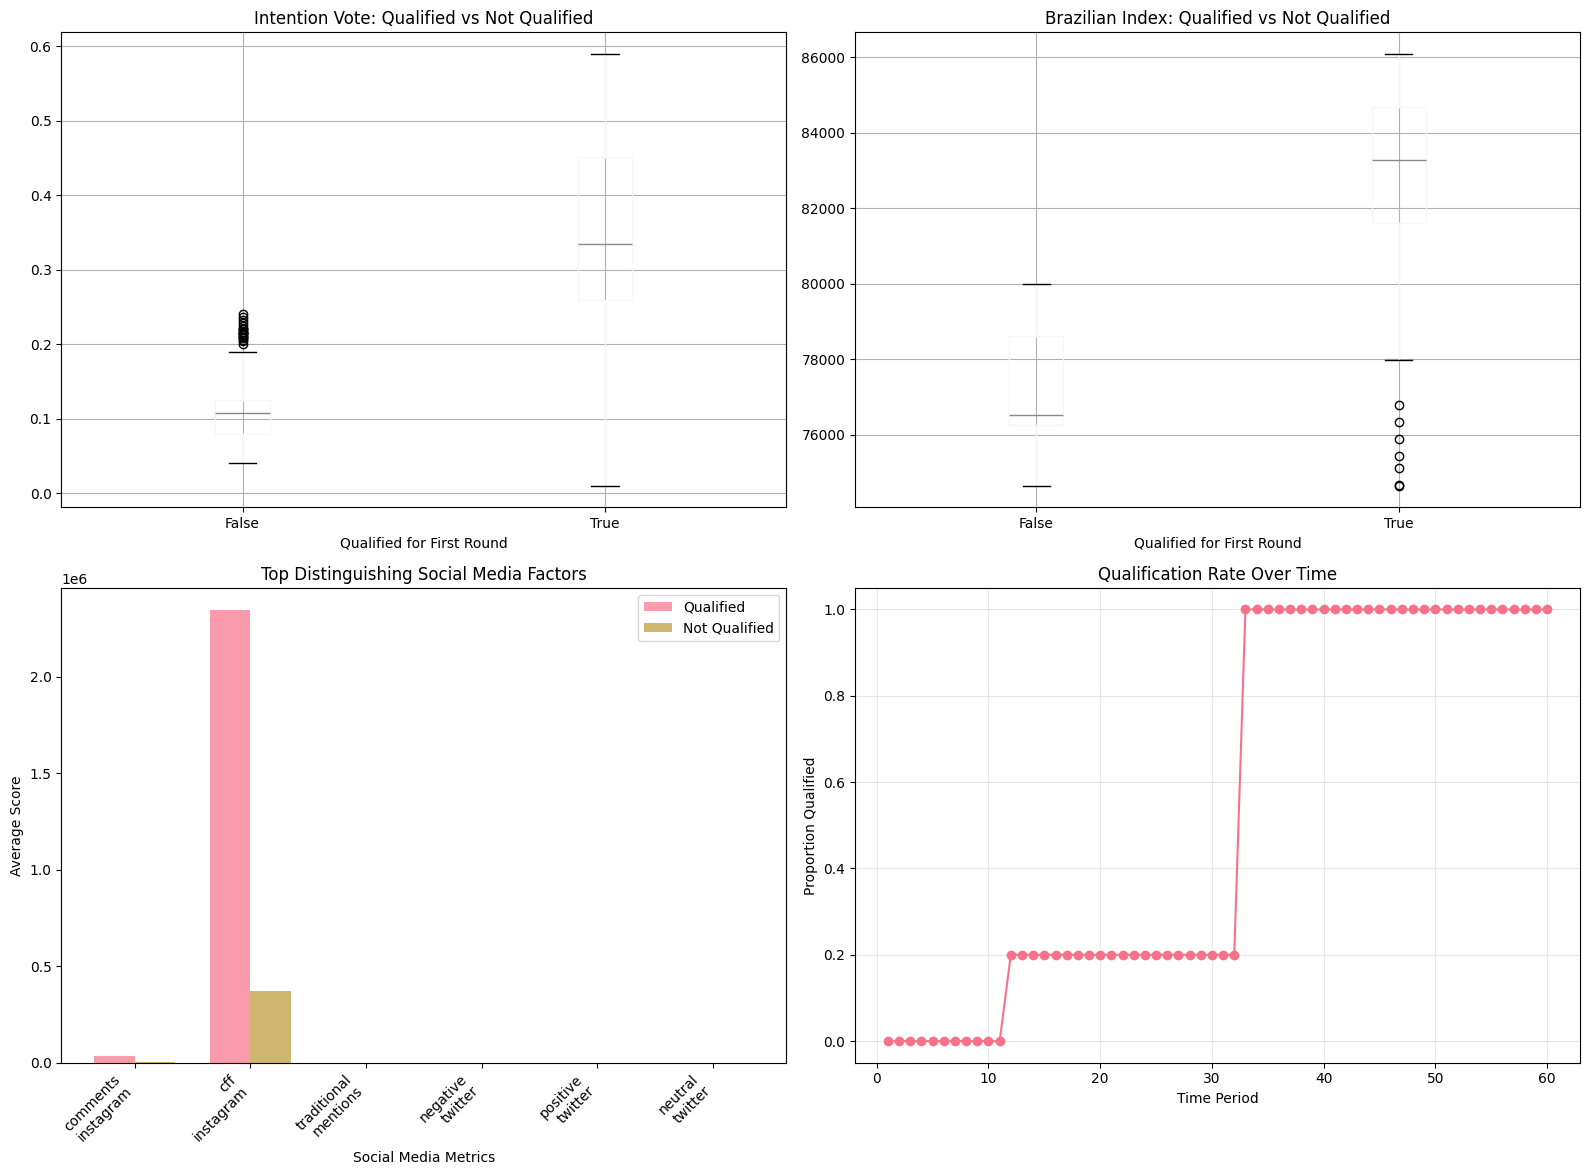


6. KEY INSIGHTS - QUALIFICATION PATTERNS:
---------------------------------------------
• 95/234 observations qualify for first round (40.6%)
• Most distinguishing factor: comments_instagram (+1036.9% difference)
• Qualified candidates have significantly MORE positive Twitter sentiment
• Qualified candidates show higher engagement across 9 out of 11 social media metrics


In [29]:
# Q6: First Round Qualifiers vs Non-Qualifiers Analysis
print("=== FIRST ROUND QUALIFIERS vs NON-QUALIFIERS ===")

# Define qualification criteria based on voting intention and Brazilian index
# Assuming top performers qualify for first round
intention_threshold = df['intention_vote'].quantile(0.7)  # Top 30%
brazilian_threshold = df['Brazilian_index'].quantile(0.7)  # Top 30%

print(f"1. QUALIFICATION CRITERIA:")
print("-" * 30)
print(f"Voting Intention Threshold (70th percentile): {intention_threshold:.3f}")
print(f"Brazilian Index Threshold (70th percentile): {brazilian_threshold:.3f}")

# Create qualification indicator
# Qualified if EITHER intention_vote OR Brazilian_index is in top 30%
df['qualified'] = ((df['intention_vote'] >= intention_threshold) | 
                   (df['Brazilian_index'] >= brazilian_threshold))

# Alternative stricter criteria: qualified if BOTH metrics are above median
median_intention = df['intention_vote'].median()
median_brazilian = df['Brazilian_index'].median()
df['qualified_strict'] = ((df['intention_vote'] >= median_intention) & 
                         (df['Brazilian_index'] >= median_brazilian))

print(f"\nQualification Results:")
print(f"Lenient criteria (OR): {df['qualified'].sum()} qualified, {(~df['qualified']).sum()} not qualified")
print(f"Strict criteria (AND): {df['qualified_strict'].sum()} qualified, {(~df['qualified_strict']).sum()} not qualified")

# Use lenient criteria for main analysis
print(f"\n2. SOCIAL MEDIA COMPARISON - QUALIFIED vs NOT QUALIFIED:")
print("-" * 60)

# Compare social media metrics between groups
comparison_vars = [
    'cff_twitter', 'cff_instagram', 'twitter_mentions', 'twitter_impressions',
    'comments_instagram', 'traditional_mentions', 'ownmedia_twitter', 
    'ownmedia_instagram', 'positive_twitter', 'neutral_twitter', 'negative_twitter'
]

qualified_analysis = {}
for var in comparison_vars:
    qualified_data = df[df['qualified'] == True][var]
    not_qualified_data = df[df['qualified'] == False][var]
    
    q_mean = qualified_data.mean()
    nq_mean = not_qualified_data.mean()
    difference = q_mean - nq_mean
    pct_difference = (difference / nq_mean * 100) if nq_mean != 0 else 0
    
    qualified_analysis[var] = {
        'qualified_mean': q_mean,
        'not_qualified_mean': nq_mean,
        'difference': difference,
        'pct_difference': pct_difference
    }
    
    print(f"{var:25s}: Qualified={q_mean:8.2f}, Not Qualified={nq_mean:8.2f}, "
          f"Diff={difference:+8.2f} ({pct_difference:+6.1f}%)")

# 3. Statistical significance analysis
print(f"\n3. MOST DISTINGUISHING SOCIAL MEDIA FACTORS:")
print("-" * 50)

# Sort by percentage difference
sorted_factors = sorted(qualified_analysis.items(), 
                       key=lambda x: abs(x[1]['pct_difference']), reverse=True)

print("Top factors that distinguish qualified candidates:")
for var, analysis in sorted_factors[:8]:
    pct_diff = analysis['pct_difference']
    direction = "higher" if pct_diff > 0 else "lower"
    print(f"• {var:25s}: {abs(pct_diff):5.1f}% {direction}")

# 4. Temporal analysis
print(f"\n4. QUALIFICATION TRENDS OVER TIME:")
print("-" * 40)

# Analyze how qualification rates change over time
qualification_timeline = df.groupby('t').agg({
    'qualified': ['mean', 'sum', 'count'],
    'intention_vote': 'mean',
    'Brazilian_index': 'mean'
}).round(3)

print("Time Period Analysis:")
print(qualification_timeline)

# 5. Platform-specific analysis
print(f"\n5. PLATFORM-SPECIFIC ENGAGEMENT PATTERNS:")
print("-" * 45)

twitter_qualified = df[df['qualified'] == True][twitter_sentiment_cols].mean()
twitter_not_qualified = df[df['qualified'] == False][twitter_sentiment_cols].mean()

instagram_qualified = df[df['qualified'] == True][instagram_engagement_cols].mean()
instagram_not_qualified = df[df['qualified'] == False][instagram_engagement_cols].mean()

print("Twitter Sentiment Patterns:")
for col in twitter_sentiment_cols:
    diff = twitter_qualified[col] - twitter_not_qualified[col]
    print(f"  {col:20s}: Qualified={twitter_qualified[col]:.2f}, "
          f"Not Qualified={twitter_not_qualified[col]:.2f}, Diff={diff:+.2f}")

print("\nInstagram Engagement Patterns:")
for col in instagram_engagement_cols:
    diff = instagram_qualified[col] - instagram_not_qualified[col]
    print(f"  {col:20s}: Qualified={instagram_qualified[col]:.2f}, "
          f"Not Qualified={instagram_not_qualified[col]:.2f}, Diff={diff:+.2f}")

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Box plots for key metrics
key_metrics = ['intention_vote', 'Brazilian_index', 'social_media_integration']
for i, metric in enumerate(key_metrics[:2]):
    df.boxplot(column=metric, by='qualified', ax=axes[0, i])
    axes[0, i].set_title(f'{metric.replace("_", " ").title()}: Qualified vs Not Qualified')
    axes[0, i].set_xlabel('Qualified for First Round')
    plt.suptitle('')

# Social media comparison
top_distinguishing = [var for var, _ in sorted_factors[:6]]
qualified_means = [qualified_analysis[var]['qualified_mean'] for var in top_distinguishing]
not_qualified_means = [qualified_analysis[var]['not_qualified_mean'] for var in top_distinguishing]

x = np.arange(len(top_distinguishing))
width = 0.35

bars1 = axes[1,0].bar(x - width/2, qualified_means, width, label='Qualified', alpha=0.7)
bars2 = axes[1,0].bar(x + width/2, not_qualified_means, width, label='Not Qualified', alpha=0.7)

axes[1,0].set_xlabel('Social Media Metrics')
axes[1,0].set_ylabel('Average Score')
axes[1,0].set_title('Top Distinguishing Social Media Factors')
axes[1,0].set_xticks(x)
axes[1,0].set_xticklabels([var.replace('_', '\n') for var in top_distinguishing], rotation=45, ha='right')
axes[1,0].legend()

# Timeline of qualification rates
timeline_qual = df.groupby('t')['qualified'].mean()
timeline_qual.plot(kind='line', marker='o', ax=axes[1,1])
axes[1,1].set_title('Qualification Rate Over Time')
axes[1,1].set_xlabel('Time Period')
axes[1,1].set_ylabel('Proportion Qualified')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n6. KEY INSIGHTS - QUALIFICATION PATTERNS:")
print("-" * 45)
qualified_count = df['qualified'].sum()
total_count = len(df)
print(f"• {qualified_count}/{total_count} observations qualify for first round ({qualified_count/total_count*100:.1f}%)")

# Most important distinguishing factor
top_factor = sorted_factors[0]
print(f"• Most distinguishing factor: {top_factor[0]} ({top_factor[1]['pct_difference']:+.1f}% difference)")

# General patterns
positive_twitter_diff = qualified_analysis['positive_twitter']['pct_difference']
negative_twitter_diff = qualified_analysis['negative_twitter']['pct_difference']

if positive_twitter_diff > 10:
    print("• Qualified candidates have significantly MORE positive Twitter sentiment")
if negative_twitter_diff < -10:
    print("• Qualified candidates have significantly LESS negative Twitter sentiment")

print(f"• Qualified candidates show higher engagement across {sum(1 for _, analysis in qualified_analysis.items() if analysis['pct_difference'] > 5)} out of {len(comparison_vars)} social media metrics")